In [2]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import os
from scipy.stats import sem
from matplotlib.lines import Line2D
import sys
sys.path.append("../../behavior")
import behavior.boris_extraction as boris
import pickle
import json
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [5]:
#each recording is aprox. 36 min long except
#21_nov and 31_nov are at double speed


#each recording has 5 ins and 4 outs except 22_nov and 32_cage
#22_nov = mice_in_df[3], mouse_out[2] is a jump period 
#32_cage last exposure starts ay 31min 26 sec and A4 ends at 31 min and 11 seconds


# for everyone including 32_cage
# baseline = 0 - mouse_in[0]
# A1 = mouse_in[0] - mouse_out[0]
# A2 = mouse_in[1] - mouse_out[1]
# A3 = mouse_in[2] - mouse_out[2]
# A4 = mouse_in[3] - mouse_out[3]
# b1 = mouse_in[4] - end

#22_nov 
# baseline = 0 - mouse_in[0]
# A1 = mouse_in[0] - mouse_out[0]
# A2 = mouse_in[1] - mouse_out[1]
# A3 = mouse_in[2] - mouse_out[3]
# jump = mouse_out[2] - mouse_in[3]
# A4 = mouse_in[4] - mouse_out[4]
# b1 = mouse_in[5] - end




In [7]:
# filename = df 

# behavior = ['anogenital sniffing', 'facial sniffing']
# subject = ['subject']
# min ITI = 1 
# min bout = 0.5

#for df create a list of mouse in and out times
#for df call boris_extract fxn which will give an array of start and stop times 
#then trim array by mouse in and mouse out times 


In [8]:

# for everyone including 32_cage
# baseline = 0 - mouse_in[0]
# A1 = mouse_in[0] - mouse_out[0]
# A2 = mouse_in[1] - mouse_out[1]
# A3 = mouse_in[2] - mouse_out[2]
# A4 = mouse_in[3] - mouse_out[3]
# b1 = mouse_in[4] - end

#22_nov 
# baseline = 0 - mouse_in[0]
# A1 = mouse_in[0] - mouse_out[0]
# A2 = mouse_in[1] - mouse_out[1]
# A3 = mouse_in[2] - mouse_out[3]
# jump = mouse_out[2] - mouse_in[3]
# A4 = mouse_in[4] - mouse_out[4]
# b1 = mouse_in[5] - end


In [5]:
def random_event_generator(start, stop, len_event, no_events):
    total_duration = stop - start
    possible_events = np.arange(int(total_duration / len_event))
    pot_events = np.random.choice(possible_events, size = (no_events), replace = False)
    pot_events = np.sort(pot_events)
    events = []
    for i in pot_events: 
        event_start = (start + (len_event * i)) * 1000
        event_stop = (event_start + (len_event * 1000))
        events.append(np.array([event_start, event_stop]))
    return(np.array(events))

In [22]:
file_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\habit_dishabit_timestamps.json"

    # Open the JSON file in read mode ('r')
with open(file_path, 'r') as file:
    # Use json.load() to parse the JSON data directly into a Python dictionary
    data_dict = json.load(file)



boris_data_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\habit_dishabit_aggregated\*"
file_paths = glob.glob(boris_data_path)

dictOfBoris={}
df_list =[]
for file_path in file_paths:
    if file_path.endswith('.csv'):
        phase1_df = pd.read_csv(file_path)
    elif file_path.endswith('.tsv'):
        phase1_df = pd.read_csv(file_path, sep='\t')
    df_list.append(phase1_df)
    phase1_df.name = file_path
    filename_no_ext = os.path.splitext(os.path.basename(file_path))[0]
    dictOfBoris[filename_no_ext] = phase1_df

In [23]:
print(data_dict.keys())
print(data_dict['11_cage_p1_merged.rec'].keys())

dict_keys(['11_cage_p1_merged.rec', '21_nov_p1_merged.rec', '31_nov_p1_merged.rec', '41_cage_p1_merged.rec', '44_nov_p1_merged.rec', '23_nov_p1_merged.rec', '12_nov_p1_merged.rec', '33_nov_p1_merged.rec', '24_cage_p1_merged.rec', '13_cage_p1_merged.rec', '33_cage_p1_merged.rec', '21_cage_p1_merged.rec', '12_cage_p1_merged.rec', '22_nov_p1_merged.rec', '31_cage_p1_merged.rec', '41_nov_p1_merged.rec', '44_cage_p1_merged.rec', '32_nov_p1_merged.rec', '23_cage_p1_merged.rec', '13_nov_p1_merged.rec', '24_nov_p1_merged.rec', '11_nov_p1_merged.rec', '32_cage_p1_merged.rec', '22_cage_p1_merged.rec'])
dict_keys(['vid_name', 'camera timestamps', 'camera timestamps play indexed', 'first_timestamp'])


In [35]:
from importlib import reload
reload(boris)
behavior = ['anogenital sniffing', 'facial sniffing']
subject = ['subject']
min_iti = 1 
min_bout = 0.5

behavior_dicts = {}
cage_dicts = {}
novel_dicts = {}
for recording, df in dictOfBoris.items():
    behavior_dict = {}
   
    recording_name = recording.replace('aggregated', 'merged.rec')
    column_names = df.columns
    for column_name in column_names:
        if 'FPS' in column_name:
            fps_column = column_name
            break
         
    fps = int(df[fps_column].unique()[0])
    print(recording_name)
    first_timestamp = data_dict[recording_name]['first_timestamp']
    cameratimestamps = np.array(data_dict[recording_name]['camera timestamps'])
    # Get all behavior bouts
    if 'Image index start' in column_names:
        sniffs = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior, min_iti, min_bout)
        facial_sniffs = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['facial sniffing'], min_iti = min_iti,min_bout =  min_bout)
        anogential_sniffs = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['anogenital sniffing'], min_iti = min_iti, min_bout = min_bout)
        fights = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['fighting'], min_iti = min_iti, min_bout = min_bout)
        chases = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['chasing'], min_iti = min_iti, min_bout = min_bout)
        allogrooming = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['allogrooming'], min_iti = min_iti, min_bout = min_bout)
        positive_social = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['anogenital sniffing', 'facial sniffing','allogrooming'], min_iti = min_iti, min_bout = min_bout)
        aversive_social = boris.get_behavior_bouts_frame(df, cameratimestamps, first_timestamp, subject, behavior = ['fighting', 'chasing'], min_iti = min_iti, min_bout = min_bout)
        ins_frames = np.array(df[df['Behavior'] == 'mice back in']["Image index start"])
        outs_frames = np.array(df[df['Behavior'] == 'mice taken out']["Image index start"])
    else:
        sniffs = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior, min_iti, min_bout)
        facial_sniffs = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['facial sniffing'], min_iti = min_iti,min_bout =  min_bout)
        anogential_sniffs = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['anogenital sniffing'], min_iti = min_iti, min_bout = min_bout)
        fights = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['fighting'], min_iti = min_iti, min_bout = min_bout)
        chases = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['chasing'], min_iti = min_iti, min_bout = min_bout)
        allogrooming = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['allogrooming'], min_iti = min_iti, min_bout = min_bout)
        positive_social = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['anogenital sniffing', 'facial sniffing','allogrooming'], min_iti = min_iti, min_bout = min_bout)
        aversive_social = boris.get_behavior_bouts_fps(df, cameratimestamps, first_timestamp, subject, behavior = ['fighting', 'chasing'], min_iti = min_iti, min_bout = min_bout)
        ins_times = np.array(df[df['Behavior'] == 'mice back in']["Start (s)"])
        outs_times = np.array(df[df['Behavior'] == 'mice taken out']["Start (s)"])
        ins_frames = np.round(ins_times * fps).astype(int)
        outs_frames = np.round(outs_times * fps).astype(int)
    # Convert to numpy arrays, ensuring empty arrays if no events
    mouse_in = (cameratimestamps[ins_frames.astype(int)] - (first_timestamp / 20000))*1000  # adjust for first timestamp
    mouse_out = (cameratimestamps[outs_frames.astype(int)] - (first_timestamp / 20000))*1000  # adjust for first timestamp
   
    sniffs = np.array(sniffs) if len(sniffs) > 0 else np.array([[0,0]])
    fights = np.array(fights) if len(fights) > 0 else np.array([[0,0]])
    chases = np.array(chases) if len(chases) > 0 else np.array([[0,0]])
    allogrooming = np.array(allogrooming) if len(allogrooming) > 0 else np.array([[0,0]])
    positive_social = np.array(positive_social) if len(positive_social) > 0 else np.array([[0,0]])
    aversive_social = np.array(aversive_social) if len(aversive_social) > 0 else np.array([[0,0]])

    # if (recording == '21_nov_p1_aggregated') | (recording == '31_nov_p1_aggregated'):
    #     if len(sniffs) > 0 and sniffs[0].size > 0:
    #         sniffs = np.array([[x*2 for x in sniff] for sniff in sniffs])
    #     if len(fights) > 0 and fights[0].size > 0:
    #         fights = np.array([[x*2 for x in fight] for fight in fights])
    #     if len(chases) > 0 and chases[0].size > 0:
    #         chases = np.array([[x*2 for x in chase] for chase in chases])
    #     if len(allogrooming) > 0 and allogrooming[0].size > 0:
    #         allogrooming = np.array([[x*2 for x in groom] for groom in allogrooming])
    #     if len(positive_social) > 0 and positive_social[0].size > 0:
    #         positive_social = np.array([[x*2 for x in pos] for pos in positive_social])
    #     if len(aversive_social) > 0 and aversive_social[0].size > 0:
    #         aversive_social = np.array([[x*2 for x in av] for av in aversive_social])
    #     mouse_in = mouse_in * 2
    #     mouse_out = mouse_out * 2

    # Generate baseline events
    behavior_dict['baseline'] = random_event_generator(start=0, stop=mouse_in[0]/1000, len_event=3, no_events=15)
    behavior_dict['positive'] = positive_social
    behavior_dict['aversive'] = aversive_social
    def filter_events(events, start_time, end_time=None):
        if events.size == 0 or events[0].size == 0:
            return np.array([[]])
        mask = (events[:,0] > start_time)
        if end_time is not None:
            mask = mask & (events[:,1] < end_time)
        filtered_events = events[mask]
        return filtered_events if filtered_events.size > 0 else np.array([[]])

    if recording == '22_nov_p1_aggregated':
        for exp_num in range(1, 6):
            if exp_num < 5:
                start_idx = exp_num - 1
                end_idx = exp_num - 1
                end_time = mouse_out[end_idx]
            else:
                start_idx = 4
                end_time = None
                
            behavior_dict[f'exp{exp_num} sniff'] = filter_events(sniffs, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} fight'] = filter_events(fights, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} chase'] = filter_events(chases, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} allogroom'] = filter_events(allogrooming, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} positive'] = filter_events(positive_social, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} aversive'] = filter_events(aversive_social, mouse_in[start_idx], end_time)
    else:
        for exp_num in range(1, 6):
            if exp_num < 5:
                start_idx = exp_num - 1
                end_idx = exp_num - 1
                end_time = mouse_out[end_idx]
            else:
                start_idx = 4
                end_time = None
                
            behavior_dict[f'exp{exp_num} sniff'] = filter_events(sniffs, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} fight'] = filter_events(fights, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} chase'] = filter_events(chases, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} allogroom'] = filter_events(allogrooming, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} positive'] = filter_events(positive_social, mouse_in[start_idx], end_time)
            behavior_dict[f'exp{exp_num} aversive'] = filter_events(aversive_social, mouse_in[start_idx], end_time)

    behavior_dicts[recording] = behavior_dict
    if "cage" in recording:
        cage_dicts[recording] = behavior_dict
    else:
        novel_dicts[recording] = behavior_dict

11_cage_p1_merged.rec
11_nov_p1_merged.rec
12_cage_p1_merged.rec
12_nov_p1_merged.rec
13_cage_p1_merged.rec
13_nov_p1_merged.rec
21_cage_p1_merged.rec
21_nov_p1_merged.rec
22_cage_p1_merged.rec
22_nov_p1_merged.rec
23_cage_p1_merged.rec
23_nov_p1_merged.rec
24_cage_p1_merged.rec
24_nov_p1_merged.rec
31_cage_p1_merged.rec
31_nov_p1_merged.rec
32_cage_p1_merged.rec
32_nov_p1_merged.rec
33_cage_p1_merged.rec
33_nov_p1_merged.rec
41_cage_p1_merged.rec
41_nov_p1_merged.rec
44_cage_p1_merged.rec
44_nov_p1_merged.rec


In [12]:
behavior = ['anogenital sniffing', 'facial sniffing']
subject = ['subject']
min_iti = 1 
min_bout = 0.5

behavior_dicts = {}
cage_dicts = {}
novel_dicts = {}
for recording, df in dictOfBoris.items():
    behavior_dict = {}
    mouse_in = np.array(df[df['Behavior'] == 'mice back in']['Start (s)'].tolist())*1000
    mouse_out = np.array(df[df['Behavior'] == 'mice taken out']['Start (s)'].tolist())*1000
    sniffs = boris.get_behavior_bouts(df, subject, behavior, min_iti, min_bout)
    fights = boris.get_behavior_bouts(df, subject, behavior = ['fighting'], min_iti = min_iti, min_bout = min_bout)
    chases = boris.get_behavior_bouts(df, subject, behavior = ['chasing'], min_iti = min_iti, min_bout = min_bout)
    allogrooming = boris.get_behavior_bouts(df, subject, behavior = ['allogrooming'], min_iti = min_iti, min_bout = min_bout)
    positive_social = boris.get_behavior_bouts(df, subject, behavior = ['allogrooming, facial sniffing','anogential sniffing'], min_iti = min_iti, min_bout = min_bout)
    aversive_social = boris.get_behavior_bouts(df, subject, behavior = ['fighting', 'chasing'], min_iti = min_iti, min_bout = min_bout)
    if (recording == '21_nov_p1_aggregated') | (recording == '31_nov_p1_aggregated'):
        sniffs = np.array([[x*2 for x in sniff] for sniff in sniffs])
        mouse_in = mouse_in *2
        mouse_out = mouse_out*2 
    if recording == '22_nov_p1_aggregated':
        behavior_dict['baseline'] = random_event_generator(start = 0, stop = mouse_in[0]/1000, len_event = 3, no_events = 15)
        behavior_dict['exp1'] = sniffs[(sniffs[:,0] > mouse_in[0]) & (sniffs[:,1] < mouse_out[0])]
        behavior_dict['exp2'] = sniffs[(sniffs[:,0] > mouse_in[1]) & (sniffs[:,1] < mouse_out[1])]
        behavior_dict['exp3'] = sniffs[(sniffs[:,0] > mouse_in[2]) & (sniffs[:,1] < mouse_out[3])]
        behavior_dict['exp4'] = sniffs[(sniffs[:,0] > mouse_in[4]) & (sniffs[:,1] < mouse_out[4])]
        behavior_dict['exp5'] = sniffs[(sniffs[:,0] > mouse_in[5])]
    else: 
        behavior_dict['baseline'] = random_event_generator(start = 0, stop = mouse_in[0]/1000, len_event = 3, no_events = 15)
        behavior_dict['exp1'] = sniffs[(sniffs[:,0] > mouse_in[0]) & (sniffs[:,1] < mouse_out[0])]
        behavior_dict['exp2'] = sniffs[(sniffs[:,0] > mouse_in[1]) & (sniffs[:,1] < mouse_out[1])]
        behavior_dict['exp3'] = sniffs[(sniffs[:,0] > mouse_in[2]) & (sniffs[:,1] < mouse_out[2])]
        behavior_dict['exp4'] = sniffs[(sniffs[:,0] > mouse_in[3]) & (sniffs[:,1] < mouse_out[3])]
        behavior_dict['exp5'] = sniffs[(sniffs[:,0] > mouse_in[4])]
    
    behavior_dicts[recording] = behavior_dict
    if "cage" in recording:
        cage_dicts[recording] = behavior_dict
    else:
        novel_dicts[recording] = behavior_dict

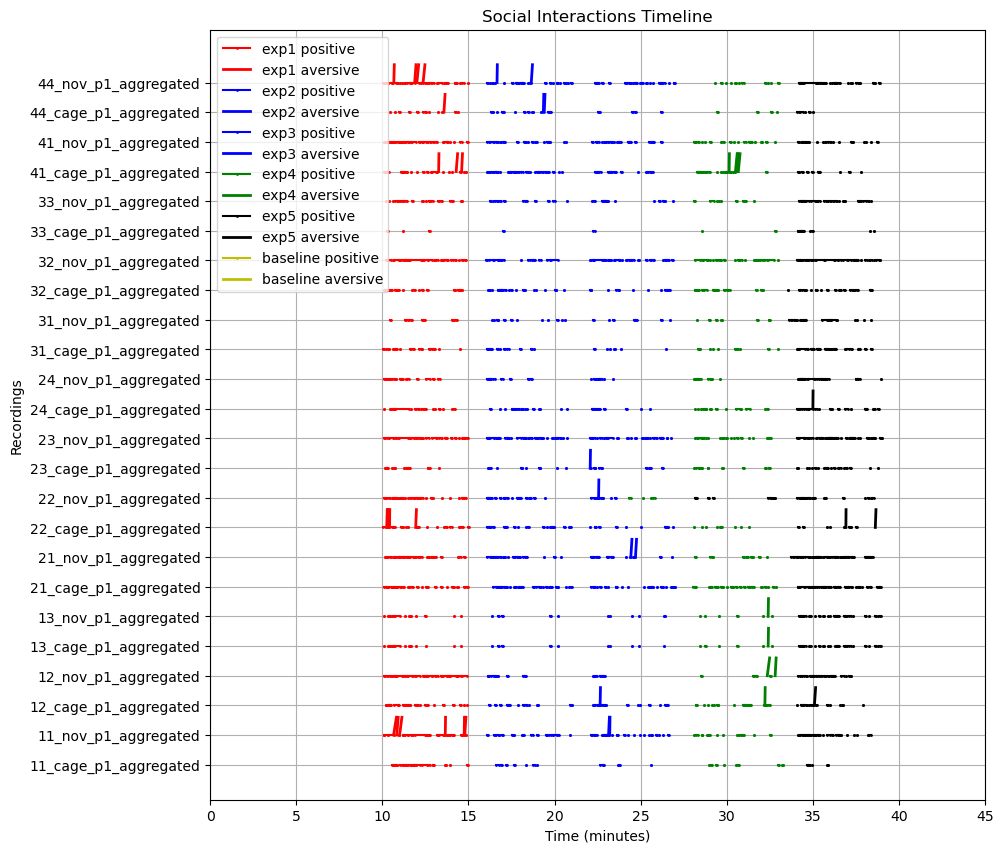

In [36]:
color_dict = {'exp1': 'r', 'exp2': 'b', 'exp3': 'b', 'exp4': 'g',
              'exp5': 'k', 'baseline': 'y'}
recording_number = 0
plt.figure(figsize=(10, 10))
labels = []

for name, recording in behavior_dicts.items():
    labels.append(name)
    for event, snippets in recording.items():
        # Only process events containing 'positive' or 'aversive'
        if 'positive' in event or 'aversive' in event:
            #if len(snippet) 
            if event == 'positive' or event == 'aversive':
                    pass
            else:
                for i in range(len(snippets)):
                    x = snippets[i]/1000/60
                    if len(x) > 0:
            # Plot the line segments
                        if ('aversive' in event):
                            # Plot taller bars for aversive interactions
                            y = [recording_number, recording_number + 0.3]
                            plt.plot(x, y, marker='', linestyle='-', c=color_dict[event.split()[0]], linewidth=2)
                        if ('positive' in event):
                            # Plot regular lines for positive interactions
                            y = [recording_number,recording_number]
                            plt.plot(x, y, marker='o', linestyle='-', c=color_dict[event.split()[0]], markersize=1)
        
    recording_number += .5

plt.xlabel('Time (minutes)')
plt.ylabel('Recordings')
plt.yticks(ticks=np.arange(len(labels))/2, labels=labels)
plt.title('Social Interactions Timeline')

# Create legend entries for positive and aversive interactions
legend_labels = []
for label in color_dict:
    # Add line for positive interactions
    legend_labels.append(plt.Line2D([0], [0], color=color_dict[label], marker='o', 
                                  linestyle='-', markersize=1, label=f'{label} positive'))
    # Add bar for aversive interactions
    legend_labels.append(plt.Line2D([0], [0], color=color_dict[label], 
                                  linestyle='-', linewidth=2, label=f'{label} aversive'))

plt.legend(handles=legend_labels)
plt.grid(True)
plt.xlim([0, 45])
plt.show()


KeyError: 'positive'

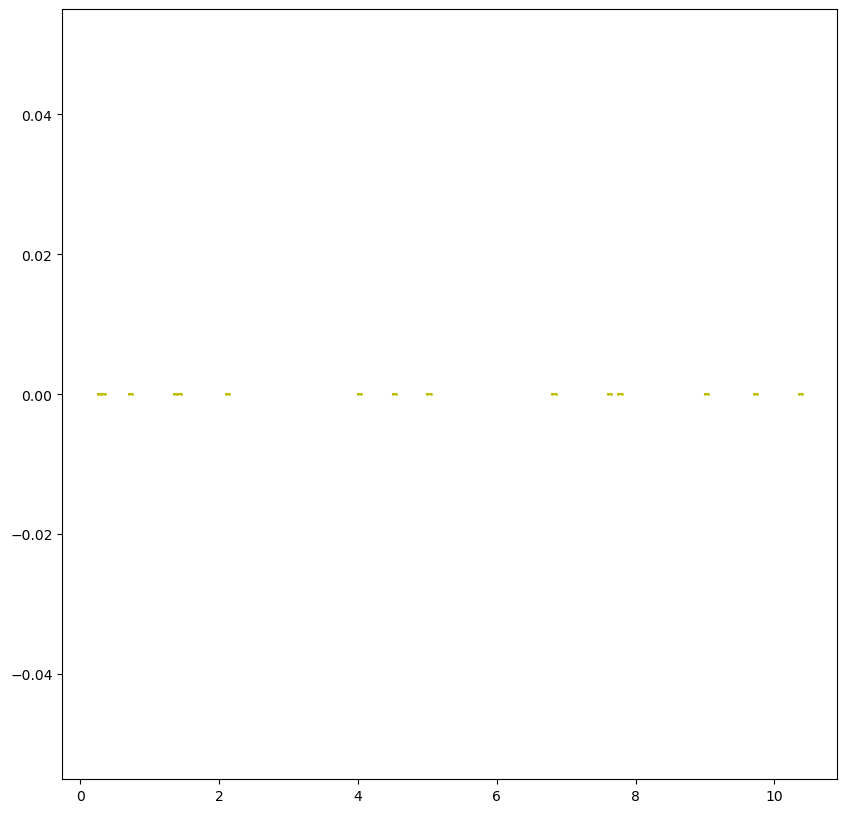

In [37]:
color_dict = {'exp1': 'r', 'exp2': 'b', 'exp3': 'b', 'exp4': 'g',
              'exp5' : 'k', 'baseline': 'y'}
recording_number = 0
plt.figure(figsize = (10,10))
labels = []
for name, recording in behavior_dicts.items():
    labels.append(name)
    for event, snippets in recording.items():
        # if (event =='exp1'
        #     ) | (event == 'exp2'
        #          ) | (event == 'exp3'
        #               ) | (event == 'exp4'
        #             ) | (event == 'exp5'):
        for i in range(len(snippets)):
            y = [recording_number,recording_number]
            x = snippets[i]/1000/60
        # Plot the line segments
            plt.plot(x, y, marker='o', linestyle='-', c= color_dict[event], markersize = 1)
    recording_number += .5
# Optionally, you can add labels, title, etc.
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(ticks=np.arange(len(labels))/2, labels=labels)
plt.title('Line Segments')
legend_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
plt.legend(handles=legend_labels)
plt.grid(True)
plt.xlim([0,45])
plt.show()

In [38]:
pickle_this(behavior_dicts, "pilot2/habit_dishabit_phase1/behavior_dicts_from_frames.pkl")

# All condition

In [30]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
subject_info = {}
for subject, behavior_dict in behavior_dicts.items():
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        if events.shape[1] != 0:
            no_events = events.shape[0]
        else: 
            no_events = 0
        sniff_length = 0
        for i in range(len(events)):
            try:
                sniff_length_temp = events[i][1] - events[i][0]
                sniff_length = sniff_length + sniff_length_temp
                total_sniffs = total_sniffs + 1
                try:
                    sniff_iti = events[i+1][0] - events[i][1]
                    if event == 'baseline':
                        pass
                    else:
                        sniff_itis.append(sniff_iti)
                except IndexError:
                    pass
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if subject in event_info.keys():
            dict_event = event_info[subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[subject] =  dict_event
        else:
            event_info[subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs)
print(event_info)

event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview
event_temp = event_overview.drop('level_0', axis = 1)
event_overview_averages = event_temp.groupby('level_1').mean()
event_overview_averages



0
6504
{'11_cage_p1_aggregated': {'baseline': {'no_events': 15, 'avg event': np.float64(3.0), 'total time': np.float64(45.0)}, 'positive': {'no_events': 50, 'avg event': np.float64(2.7733600000000025), 'total time': np.float64(138.66800000000012)}, 'aversive': {'no_events': 1, 'avg event': np.float64(0.0), 'total time': np.float64(0.0)}, 'exp1 sniff': {'no_events': 21, 'avg event': np.float64(3.0222857142857142), 'total time': np.float64(63.468)}, 'exp1 fight': {'no_events': 0, 'avg event': 0, 'total time': 0.0}, 'exp1 chase': {'no_events': 0, 'avg event': 0, 'total time': 0.0}, 'exp1 allogroom': {'no_events': 0, 'avg event': 0, 'total time': 0.0}, 'exp1 positive': {'no_events': 21, 'avg event': np.float64(3.0222857142857142), 'total time': np.float64(63.468)}, 'exp1 aversive': {'no_events': 0, 'avg event': 0, 'total time': 0.0}, 'exp2 sniff': {'no_events': 7, 'avg event': np.float64(3.866714285714302), 'total time': np.float64(27.067000000000117)}, 'exp2 fight': {'no_events': 0, 'avg 

baseline    positive  aversive  exp1 sniff  exp1 fight  \
level_1                                                              
avg event        3.0    2.868883  1.364835    3.335243    0.676235   
no_events       15.0   83.000000  2.416667   20.541667    0.875000   
total time      45.0  241.541708  5.797958   72.391292    2.727875   

            exp1 chase  exp1 allogroom  exp1 positive  exp1 aversive  \
level_1                                                                
avg event     0.027792        0.601550       3.349808       0.676235   
no_events     0.041667        0.583333      20.916667       0.875000   
total time    0.027792        2.110958      74.535750       2.727875   

            exp2 sniff  ...  exp4 chase  exp4 allogroom  exp4 positive  \
level_1                 ...                                              
avg event     2.534004  ...         0.0        0.896875       2.425811   
no_events    15.875000  ...         0.0        0.375000      12.416667   
total time   39.611083  ...         0.0        1.614583      28.820208   

            exp4 aversive  exp5 sniff  exp5 fight  exp5 chase  exp5 allogroom  \
level_1                                                                         
avg event        0.461781    3.258387    0.258333    0.033333        0.667332   
no_events        0.333333   19.833333    0.166667    0.041667        0.791667   
total time       1.094375   65.058833    0.316667    0.033333        3.141750   

            exp5 positive  exp5 aversive  
level_1                                   
avg event        3.340912       0.258333  
no_events       20.291667       0.166667  
total time      68.267417       0.316667  

[3 rows x 33 columns]

In [31]:
event_overview["condition"] = event_overview["level_0"].apply(lambda x: "cagemate" if "cage" in x.lower() else "novel" if "nov" in x.lower() else x)
event_overview

level_0     level_1  baseline    positive   aversive  \
0   11_cage_p1_aggregated   no_events      15.0   50.000000   1.000000   
1   11_cage_p1_aggregated   avg event       3.0    2.773360   0.000000   
2   11_cage_p1_aggregated  total time      45.0  138.668000   0.000000   
3    11_nov_p1_aggregated   no_events      15.0   99.000000   9.000000   
4    11_nov_p1_aggregated   avg event       3.0    3.695111   3.575222   
..                    ...         ...       ...         ...        ...   
67  44_cage_p1_aggregated   avg event       3.0    2.546341   2.622333   
68  44_cage_p1_aggregated  total time      45.0  104.400000   7.867000   
69   44_nov_p1_aggregated   no_events      15.0  120.000000   6.000000   
70   44_nov_p1_aggregated   avg event       3.0    2.522850   3.739667   
71   44_nov_p1_aggregated  total time      45.0  302.742000  22.438000   

    exp1 sniff  exp1 fight  exp1 chase  exp1 allogroom  exp1 positive  ...  \
0    21.000000    0.000000       0.000             0.0      21.000000  ...   
1     3.022286    0.000000       0.000             0.0       3.022286  ...   
2    63.468000    0.000000       0.000             0.0      63.468000  ...   
3    20.000000    8.000000       1.000             0.0      20.000000  ...   
4     8.150600    3.472125       0.667             0.0       8.150600  ...   
..         ...         ...         ...             ...            ...  ...   
67    2.036364    4.000000       0.000             2.8       2.100000  ...   
68   22.400000    4.000000       0.000             2.8      25.200000  ...   
69   32.000000    4.000000       0.000             0.0      32.000000  ...   
70    3.539000    4.406250       0.000             0.0       3.539000  ...   
71  113.248000   17.625000       0.000             0.0     113.248000  ...   

    exp4 allogroom  exp4 positive  exp4 aversive  exp5 sniff  exp5 fight  \
0              0.0      10.000000            0.0    5.000000         0.0   
1              0.0       1.806900            0.0    2.506600         0.0   
2              0.0      18.069000            0.0   12.533000         0.0   
3              0.0      13.000000            0.0   23.000000         0.0   
4              0.0       1.630923            0.0    2.739130         0.0   
..             ...            ...            ...         ...         ...   
67             0.0       2.283500            0.0    4.555500         0.0   
68             0.0       9.134000            0.0   27.333000         0.0   
69             0.0      13.000000            0.0   28.000000         0.0   
70             0.0       1.389308            0.0    3.022143         0.0   
71             0.0      18.061000            0.0   84.620000         0.0   

    exp5 chase  exp5 allogroom  exp5 positive  exp5 aversive  condition  
0          0.0             0.0       5.000000            0.0   cagemate  
1          0.0             0.0       2.506600            0.0   cagemate  
2          0.0             0.0      12.533000            0.0   cagemate  
3          0.0             0.0      23.000000            0.0      novel  
4          0.0             0.0       2.739130            0.0      novel  
..         ...             ...            ...            ...        ...  
67         0.0             0.0       4.555500            0.0   cagemate  
68         0.0             0.0      27.333000            0.0   cagemate  
69         0.0             0.0      28.000000            0.0      novel  
70         0.0             0.0       3.022143            0.0      novel  
71         0.0             0.0      84.620000            0.0      novel  

[72 rows x 36 columns]

In [32]:
len_events_df = event_overview[event_overview["level_1"] == "avg event"]
no_events_df = event_overview[event_overview["level_1"] == "no_events"]
total_time_df = event_overview[event_overview["level_1"] == "total time"]


In [33]:
allogroom = event_overview[['level_0', 'level_1','exp1 allogroom','exp2 allogroom', 'exp3 allogroom', 'exp4 allogroom', 'exp5 allogroom']]

In [34]:
allogroom[allogroom["level_1"] == 'no_events']

level_0    level_1  exp1 allogroom  exp2 allogroom  \
0   11_cage_p1_aggregated  no_events             0.0             0.0   
3    11_nov_p1_aggregated  no_events             0.0             0.0   
6   12_cage_p1_aggregated  no_events             0.0             0.0   
9    12_nov_p1_aggregated  no_events             3.0             0.0   
12  13_cage_p1_aggregated  no_events             0.0             0.0   
15   13_nov_p1_aggregated  no_events             0.0             0.0   
18  21_cage_p1_aggregated  no_events             0.0             0.0   
21   21_nov_p1_aggregated  no_events             0.0             0.0   
24  22_cage_p1_aggregated  no_events             0.0             0.0   
27   22_nov_p1_aggregated  no_events             3.0             0.0   
30  23_cage_p1_aggregated  no_events             0.0             0.0   
33   23_nov_p1_aggregated  no_events             0.0             0.0   
36  24_cage_p1_aggregated  no_events             0.0             0.0   
39   24_nov_p1_aggregated  no_events             7.0             3.0   
42  31_cage_p1_aggregated  no_events             0.0             0.0   
45   31_nov_p1_aggregated  no_events             0.0             0.0   
48  32_cage_p1_aggregated  no_events             0.0             0.0   
51   32_nov_p1_aggregated  no_events             0.0             0.0   
54  33_cage_p1_aggregated  no_events             0.0             0.0   
57   33_nov_p1_aggregated  no_events             0.0             0.0   
60  41_cage_p1_aggregated  no_events             0.0             0.0   
63   41_nov_p1_aggregated  no_events             0.0             0.0   
66  44_cage_p1_aggregated  no_events             1.0             0.0   
69   44_nov_p1_aggregated  no_events             0.0             0.0   

    exp3 allogroom  exp4 allogroom  exp5 allogroom  
0              0.0             0.0             0.0  
3              2.0             0.0             0.0  
6              1.0             0.0             0.0  
9              0.0             1.0             4.0  
12             0.0             0.0             0.0  
15             0.0             2.0             0.0  
18             0.0             0.0             0.0  
21             0.0             0.0             0.0  
24             0.0             0.0             0.0  
27             0.0             1.0             1.0  
30             0.0             0.0             0.0  
33             1.0             0.0             0.0  
36             0.0             0.0             0.0  
39             2.0             4.0            13.0  
42             0.0             0.0             0.0  
45             0.0             0.0             0.0  
48             0.0             0.0             0.0  
51             0.0             0.0             1.0  
54             0.0             0.0             0.0  
57             0.0             0.0             0.0  
60             0.0             1.0             0.0  
63             0.0             0.0             0.0  
66             0.0             0.0             0.0  
69             0.0             0.0             0.0

In [35]:
test = no_events_df[no_events_df['condition'] == 'cagemate'][['exp1 aversive', 'exp4 aversive', 'exp5 aversive']]
test

exp1 aversive  exp4 aversive  exp5 aversive
0             0.0            0.0            0.0
6             0.0            1.0            1.0
12            0.0            1.0            0.0
18            0.0            0.0            0.0
24            5.0            0.0            2.0
30            0.0            0.0            0.0
36            0.0            0.0            1.0
42            0.0            0.0            0.0
48            0.0            0.0            0.0
54            0.0            0.0            0.0
60            3.0            4.0            0.0
66            1.0            0.0            0.0

In [36]:
test.mean()

exp1 aversive    0.750000
exp4 aversive    0.500000
exp5 aversive    0.333333
dtype: float64

In [41]:
from statsmodels.stats.multitest import multipletests
def plot_and_analyze_selected_experiments(df, title, x_title, experiments=['exp1 sniff', 'exp4 sniff', 'exp5 sniff']):
    # Get unique conditions from level_0
    conditions = df['condition'].unique()
    colors = {
        'cagemate': hex_2_rgb('#CDBE8A'),
        'novel': hex_2_rgb('#DF8C8C')
    }
    
    # Prepare data for plotting
    means = {}
    sems = {}
    for cond in conditions:
        means[cond] = df[df['condition'] == cond][experiments].mean()
        sems[cond] = df[df['condition'] == cond][experiments].sem()
    print(means, sems)
    # Create bar plot
    x = np.arange(len(experiments))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, means[conditions[0]], width, linewidth = 2,
           yerr=sems[conditions[0]], label=conditions[0],
           capsize=5, color = colors[conditions[0]], edgecolor = 'black', error_kw={'elinewidth': 2, 'capthick': 2})
    ax.bar(x + width/2, means[conditions[1]], width, label=conditions[1], linewidth = 2,
           yerr=sems[conditions[1]], color = colors[conditions[1]], capsize = 5, edgecolor='black', error_kw={'elinewidth': 2, 'capthick': 2})
    plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
    plt.gca().spines['left'].set_linewidth(2)
    # Customize plot
    ax.set_xticks(x)
    ax.set_xticklabels(experiments, fontsize = 20)
    ax.tick_params(axis='y', labelsize=16)
    ax.legend(fontsize = 20, frameon= False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel(f'{x_title}', fontsize = 20)
    plt.title(f'{title}', fontsize = 24)
    
    # Run statistical analysis
    p_values = []
    t_stats = []
    for exp in experiments:
        cond1_data = df[df['condition'] == conditions[0]].sort_values('level_0')[exp]
        cond2_data = df[df['condition'] == conditions[1]].sort_values('level_0')[exp]
        t_stat, p_val = stats.ttest_rel(cond1_data, cond2_data)
        t_stats.append(t_stat)
        p_values.append(p_val)
    
    # Apply Holm-Bonferroni correction
    rejected, p_corrected, _, _ = multipletests(p_values, method='holm')
    
    # Print statistical results
    print("\nStatistical Analysis Results:")
    for i, exp in enumerate(experiments):
        print(f"\n{exp}:")
        print(f"t-statistic: {t_stats[i]:.4f}")
        print(f"Raw p-value: {p_values[i]:.4f}")
        print(f"Corrected p-value: {p_corrected[i]:.4f}")
        print(f"Significant: {rejected[i]}")
    
    plt.show()
    
    return p_values, p_corrected

{'cagemate': exp1 sniff    2.178756
exp4 sniff    2.086299
exp5 sniff    2.575600
dtype: float64, 'novel': exp1 sniff    4.491730
exp4 sniff    2.485295
exp5 sniff    3.941173
dtype: float64} {'cagemate': exp1 sniff    0.180749
exp4 sniff    0.208088
exp5 sniff    0.279630
dtype: float64, 'novel': exp1 sniff    0.470297
exp4 sniff    0.253361
exp5 sniff    0.513778
dtype: float64}

Statistical Analysis Results:

exp1 sniff:
t-statistic: -4.8613
Raw p-value: 0.0005
Corrected p-value: 0.0015
Significant: True

exp4 sniff:
t-statistic: -1.2257
Raw p-value: 0.2459
Corrected p-value: 0.2459
Significant: False

exp5 sniff:
t-statistic: -2.5956
Raw p-value: 0.0249
Corrected p-value: 0.0498
Significant: True


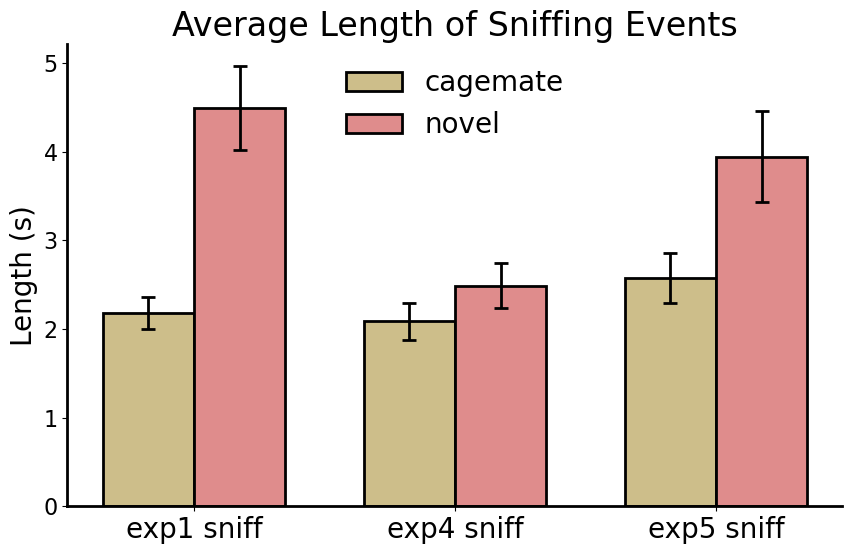

{'cagemate': exp1 aversive    0.695939
exp4 aversive    0.445813
exp5 aversive    0.516667
dtype: float64, 'novel': exp1 aversive    0.656531
exp4 aversive    0.477750
exp5 aversive    0.000000
dtype: float64} {'cagemate': exp1 aversive    0.394565
exp4 aversive    0.274910
exp5 aversive    0.356293
dtype: float64, 'novel': exp1 aversive    0.446351
exp4 aversive    0.477750
exp5 aversive    0.000000
dtype: float64}

Statistical Analysis Results:

exp1 aversive:
t-statistic: 0.0953
Raw p-value: 0.9258
Corrected p-value: 1.0000
Significant: False

exp4 aversive:
t-statistic: -0.0632
Raw p-value: 0.9508
Corrected p-value: 1.0000
Significant: False

exp5 aversive:
t-statistic: 1.4501
Raw p-value: 0.1749
Corrected p-value: 0.5248
Significant: False


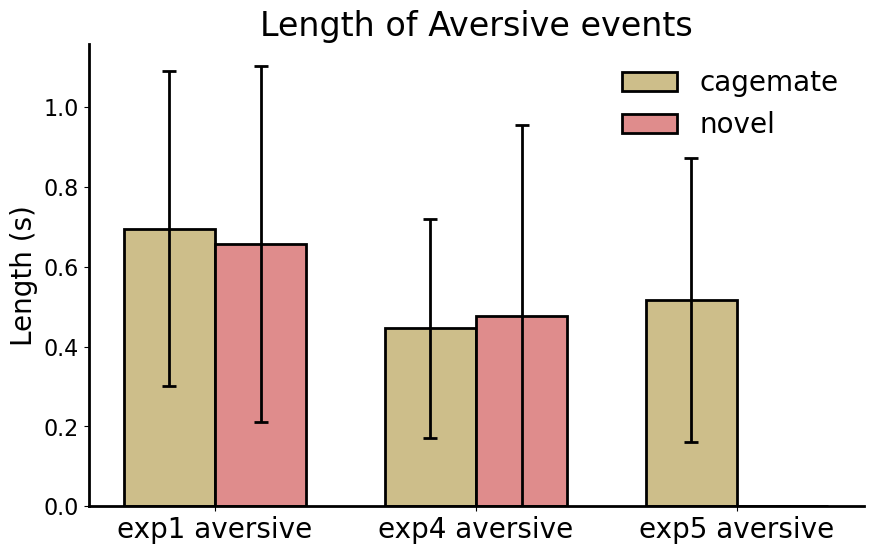

([np.float64(0.9257792133503531),
  np.float64(0.9507711745760955),
  np.float64(0.1749335336218157)],
 array([1.       , 1.       , 0.5248006]))

In [42]:
plot_and_analyze_selected_experiments(len_events_df, title = 'Average Length of Sniffing Events', x_title = "Length (s)")
plot_and_analyze_selected_experiments(len_events_df, title = "Length of Aversive events", x_title = 'Length (s)', experiments=['exp1 aversive', 'exp4 aversive', 'exp5 aversive'])

{'cagemate': exp1 sniff    17.333333
exp4 sniff    11.916667
exp5 sniff    16.000000
dtype: float64, 'novel': exp1 sniff    23.750000
exp4 sniff    12.416667
exp5 sniff    23.666667
dtype: float64} {'cagemate': exp1 sniff    2.053575
exp4 sniff    1.916667
exp5 sniff    2.427744
dtype: float64, 'novel': exp1 sniff    2.256724
exp4 sniff    2.349914
exp5 sniff    2.375166
dtype: float64}

Statistical Analysis Results:

exp1 sniff:
t-statistic: -2.0745
Raw p-value: 0.0623
Corrected p-value: 0.1869
Significant: False

exp4 sniff:
t-statistic: -0.1529
Raw p-value: 0.8812
Corrected p-value: 0.8812
Significant: False

exp5 sniff:
t-statistic: -2.0204
Raw p-value: 0.0684
Corrected p-value: 0.1869
Significant: False


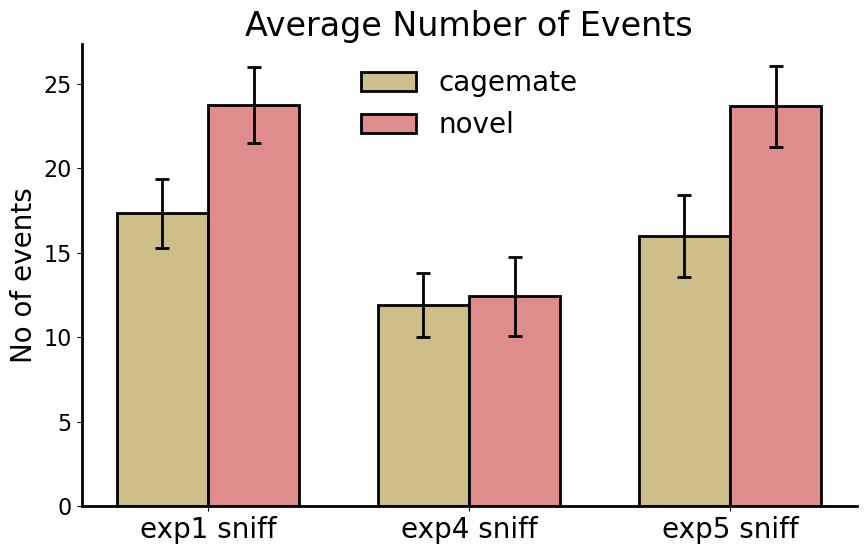

{'cagemate': exp1 aversive    0.750000
exp4 aversive    0.500000
exp5 aversive    0.333333
dtype: float64, 'novel': exp1 aversive    1.000000
exp4 aversive    0.166667
exp5 aversive    0.000000
dtype: float64} {'cagemate': exp1 aversive    0.462618
exp4 aversive    0.337100
exp5 aversive    0.188025
dtype: float64, 'novel': exp1 aversive    0.717741
exp4 aversive    0.166667
exp5 aversive    0.000000
dtype: float64}

Statistical Analysis Results:

exp1 aversive:
t-statistic: -0.2787
Raw p-value: 0.7857
Corrected p-value: 0.7857
Significant: False

exp4 aversive:
t-statistic: 0.9381
Raw p-value: 0.3683
Corrected p-value: 0.7367
Significant: False

exp5 aversive:
t-statistic: 1.7728
Raw p-value: 0.1039
Corrected p-value: 0.3117
Significant: False


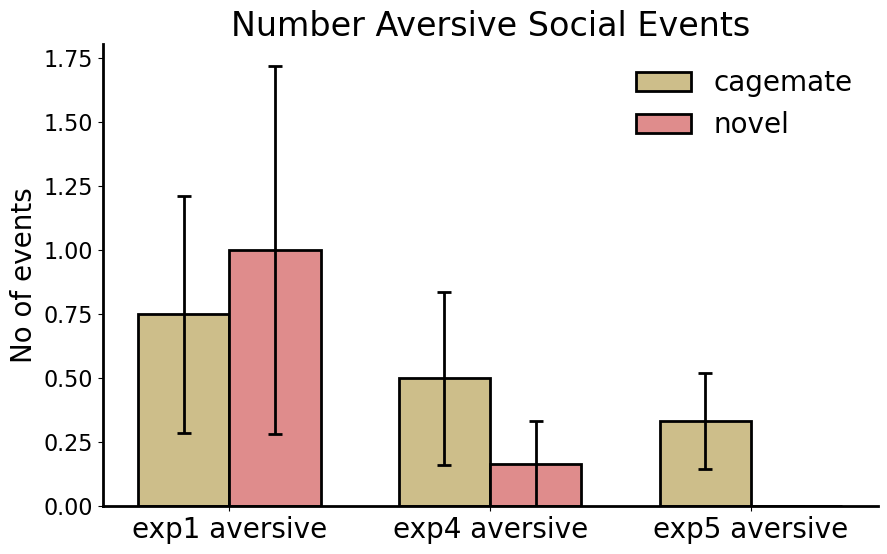

([np.float64(0.7856804701330673),
  np.float64(0.3683425946590331),
  np.float64(0.10391572266321404)],
 array([0.78568047, 0.73668519, 0.31174717]))

In [43]:
plot_and_analyze_selected_experiments(no_events_df, title = 'Average Number of Events', x_title = "No of events")
plot_and_analyze_selected_experiments(no_events_df, title = "Number Aversive Social Events", x_title = 'No of events', experiments=['exp1 aversive', 'exp4 aversive', 'exp5 aversive'])

{'cagemate': exp1 sniff    38.124333
exp4 sniff    25.355917
exp5 sniff    42.371667
dtype: float64, 'novel': exp1 sniff    106.658250
exp4 sniff     29.055167
exp5 sniff     87.746000
dtype: float64} {'cagemate': exp1 sniff    5.687728
exp4 sniff    4.970247
exp5 sniff    8.884863
dtype: float64, 'novel': exp1 sniff    14.416372
exp4 sniff     5.985835
exp5 sniff    11.398405
dtype: float64}

Statistical Analysis Results:

exp1 sniff:
t-statistic: -4.5411
Raw p-value: 0.0008
Corrected p-value: 0.0025
Significant: True

exp4 sniff:
t-statistic: -0.5762
Raw p-value: 0.5761
Corrected p-value: 0.5761
Significant: False

exp5 sniff:
t-statistic: -3.9482
Raw p-value: 0.0023
Corrected p-value: 0.0046
Significant: True


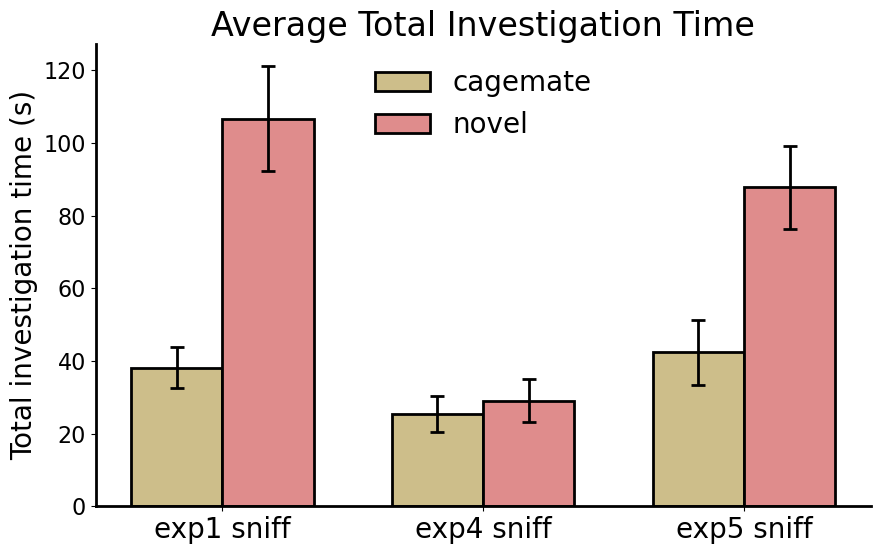

{'cagemate': exp1 aversive    1.672250
exp4 aversive    1.233250
exp5 aversive    0.633333
dtype: float64, 'novel': exp1 aversive    3.7835
exp4 aversive    0.9555
exp5 aversive    0.0000
dtype: float64} {'cagemate': exp1 aversive    0.921207
exp4 aversive    1.040556
exp5 aversive    0.399115
dtype: float64, 'novel': exp1 aversive    2.626243
exp4 aversive    0.955500
exp5 aversive    0.000000
dtype: float64}

Statistical Analysis Results:

exp1 aversive:
t-statistic: -0.7546
Raw p-value: 0.4663
Corrected p-value: 0.9327
Significant: False

exp4 aversive:
t-statistic: 0.1946
Raw p-value: 0.8492
Corrected p-value: 0.9327
Significant: False

exp5 aversive:
t-statistic: 1.5868
Raw p-value: 0.1409
Corrected p-value: 0.4226
Significant: False


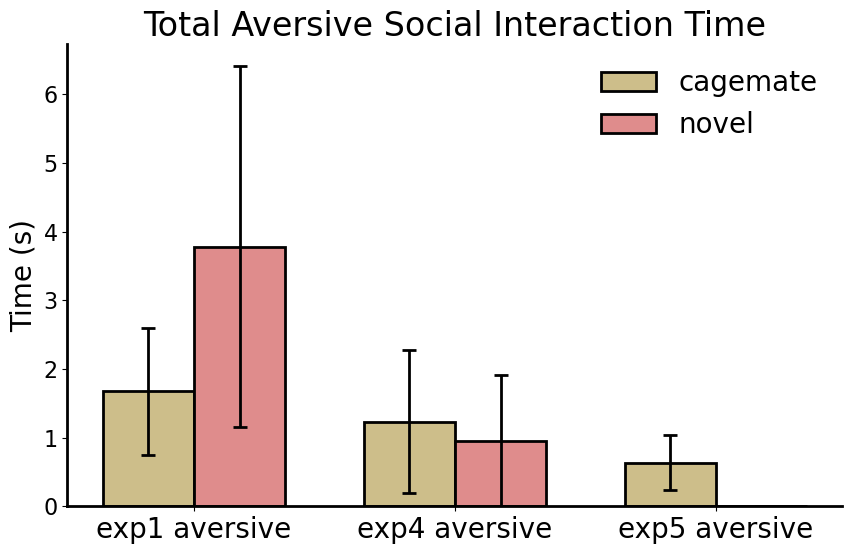

([np.float64(0.46633858162414954),
  np.float64(0.8492211337966211),
  np.float64(0.1408552573688174)],
 array([0.93267716, 0.93267716, 0.42256577]))

In [44]:
plot_and_analyze_selected_experiments(total_time_df, title = 'Average Total Investigation Time', x_title = "Total investigation time (s)")
plot_and_analyze_selected_experiments(total_time_df, title = "Total Aversive Social Interaction Time", x_title = 'Time (s)', experiments=['exp1 aversive', 'exp4 aversive', 'exp5 aversive'])

In [88]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'exp1': np.float64(72.39129166666667),
 'exp2': np.float64(39.61108333333332),
 'exp3': np.float64(29.22425),
 'exp4': np.float64(27.691708333333324),
 'exp5': np.float64(64.36712500000003)}

In [89]:
data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['total time'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

['11_cage_p1_aggregated', '11_nov_p1_aggregated', '12_cage_p1_aggregated', '12_nov_p1_aggregated', '13_cage_p1_aggregated', '13_nov_p1_aggregated', '21_cage_p1_aggregated', '21_nov_p1_aggregated', '22_cage_p1_aggregated', '22_nov_p1_aggregated', '23_cage_p1_aggregated', '23_nov_p1_aggregated', '24_cage_p1_aggregated', '24_nov_p1_aggregated', '31_cage_p1_aggregated', '31_nov_p1_aggregated', '32_cage_p1_aggregated', '32_nov_p1_aggregated', '33_cage_p1_aggregated', '33_nov_p1_aggregated', '41_cage_p1_aggregated', '41_nov_p1_aggregated', '44_cage_p1_aggregated', '44_nov_p1_aggregated']
['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
(5, 24)
(5, 24)


['11_cage_p1_aggregated', '11_nov_p1_aggregated', '12_cage_p1_aggregated', '12_nov_p1_aggregated', '13_cage_p1_aggregated', '13_nov_p1_aggregated', '21_cage_p1_aggregated', '21_nov_p1_aggregated', '22_cage_p1_aggregated', '22_nov_p1_aggregated', '23_cage_p1_aggregated', '23_nov_p1_aggregated', '24_cage_p1_aggregated', '24_nov_p1_aggregated', '31_cage_p1_aggregated', '31_nov_p1_aggregated', '32_cage_p1_aggregated', '32_nov_p1_aggregated', '33_cage_p1_aggregated', '33_nov_p1_aggregated', '41_cage_p1_aggregated', '41_nov_p1_aggregated', '44_cage_p1_aggregated', '44_nov_p1_aggregated']


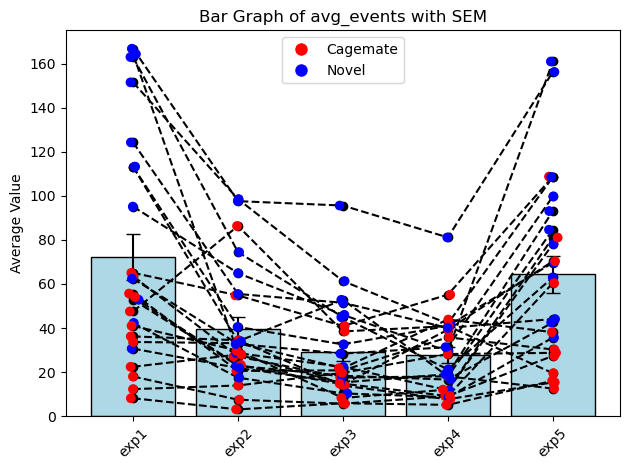

In [90]:
print(subjects)
x = np.arange(len(avg_events))
labels = event_agent_time_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

legend_elements = [Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor='red', label='Cagemate', markersize=10),
                  Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor='blue', label='Novel', markersize=10)]

# Add the legend
plt.legend(handles=legend_elements)
# Add labels and title
plt.xticks(x, labels, rotation = 45)
plt.ylabel('Average Value')
plt.title('Bar Graph of avg_events with SEM')

# Show the plot
plt.tight_layout()
plt.show()


# Cagemate data

In [91]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
subject_info = {}
for subject, behavior_dict in cage_dicts.items():
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if subject in event_info.keys():
            dict_event = event_info[subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[subject] =  dict_event
        else:
            event_info[subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs)
print(event_info)

event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview
event_temp = event_overview.drop('level_0', axis = 1)
event_overview_averages = event_temp.groupby('level_1').mean()
event_overview_averages



0
840
{'11_cage_p1_aggregated': {'exp1': {'no_events': 21, 'avg event': np.float64(3.0222857142857142), 'total time': np.float64(63.468)}, 'exp2': {'no_events': 7, 'avg event': np.float64(3.866714285714302), 'total time': np.float64(27.067000000000117)}, 'exp3': {'no_events': 7, 'avg event': np.float64(2.5044285714285714), 'total time': np.float64(17.531)}, 'exp4': {'no_events': 10, 'avg event': np.float64(1.8069000000000002), 'total time': np.float64(18.069)}, 'exp5': {'no_events': 5, 'avg event': np.float64(2.5065999999999997), 'total time': np.float64(12.533)}}, '12_cage_p1_aggregated': {'exp1': {'no_events': 24, 'avg event': np.float64(2.3194166666666667), 'total time': np.float64(55.666)}, 'exp2': {'no_events': 13, 'avg event': np.float64(1.5794615384615385), 'total time': np.float64(20.533)}, 'exp3': {'no_events': 16, 'avg event': np.float64(1.3), 'total time': np.float64(20.8)}, 'exp4': {'no_events': 19, 'avg event': np.float64(1.8841052631578947), 'total time': np.float64(35.79

exp1       exp2       exp3       exp4       exp5
level_1                                                          
avg event    2.178756   2.085282   2.258632   2.086299   2.575600
no_events   17.333333  15.000000   9.750000  11.916667  16.000000
total time  38.124333  30.137917  18.495750  25.355917  42.371667

In [242]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'baseline': np.float64(45.0),
 'exp1 sniff': np.float64(72.39129166666667),
 'exp1 fight': np.float64(2.7278749999999996),
 'exp1 chase': np.float64(0.02779166666666667),
 'exp1 allogroom': np.float64(2.110958333333333),
 'exp1 positive': np.float64(24.71608333333333),
 'exp1 aversive': np.float64(2.7278749999999996),
 'exp2 sniff': np.float64(39.61108333333332),
 'exp2 fight': np.float64(0.36166666666666664),
 'exp2 chase': np.float64(0.0),
 'exp2 allogroom': np.float64(0.3082916666666667),
 'exp2 positive': np.float64(19.77241666666666),
 'exp2 aversive': np.float64(0.36166666666666664),
 'exp3 sniff': np.float64(29.018708333333336),
 'exp3 fight': np.float64(0.9057499999999999),
 'exp3 chase': np.float64(0.0),
 'exp3 allogroom': np.float64(0.8777500000000001),
 'exp3 positive': np.float64(16.82529166666667),
 'exp3 aversive': np.float64(0.9057499999999999),
 'exp4 sniff': np.float64(27.205541666666658),
 'exp4 fight': np.float64(1.094375),
 'exp4 chase': np.float64(0.0),
 'exp4 all

In [243]:
data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['total time'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

['11_cage_p1_aggregated', '11_nov_p1_aggregated', '12_cage_p1_aggregated', '12_nov_p1_aggregated', '13_cage_p1_aggregated', '13_nov_p1_aggregated', '21_cage_p1_aggregated', '21_nov_p1_aggregated', '22_cage_p1_aggregated', '22_nov_p1_aggregated', '23_cage_p1_aggregated', '23_nov_p1_aggregated', '24_cage_p1_aggregated', '24_nov_p1_aggregated', '31_cage_p1_aggregated', '31_nov_p1_aggregated', '32_cage_p1_aggregated', '32_nov_p1_aggregated', '33_cage_p1_aggregated', '33_nov_p1_aggregated', '41_cage_p1_aggregated', '41_nov_p1_aggregated', '44_cage_p1_aggregated', '44_nov_p1_aggregated']
['baseline', 'exp1 sniff', 'exp1 fight', 'exp1 chase', 'exp1 allogroom']
(31, 24)
(31, 24)


['11_cage_p1_aggregated', '12_cage_p1_aggregated', '13_cage_p1_aggregated', '21_cage_p1_aggregated', '22_cage_p1_aggregated', '23_cage_p1_aggregated', '24_cage_p1_aggregated', '31_cage_p1_aggregated', '32_cage_p1_aggregated', '33_cage_p1_aggregated', '41_cage_p1_aggregated', '44_cage_p1_aggregated']


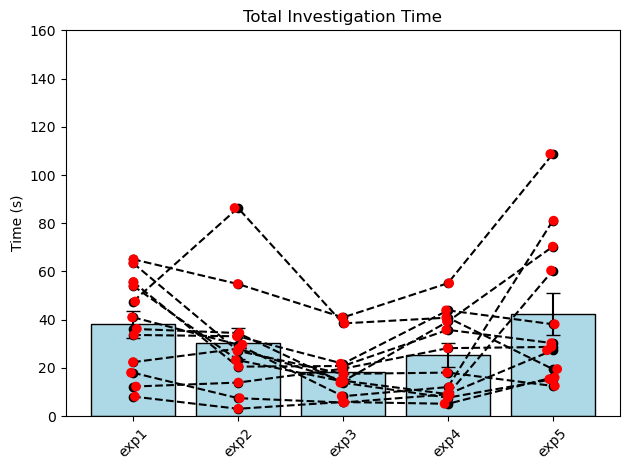

In [94]:
print(subjects)
x = np.arange(len(avg_events))
labels = event_agent_time_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

plt.xticks(x, labels, rotation = 45)
plt.ylabel('Time (s)')
plt.title('Total Investigation Time')
plt.ylim([0,160])
# Show the plot
plt.tight_layout()
plt.show()

### Total number of events

['11_cage_p1_aggregated', '12_cage_p1_aggregated', '13_cage_p1_aggregated', '21_cage_p1_aggregated', '22_cage_p1_aggregated', '23_cage_p1_aggregated', '24_cage_p1_aggregated', '31_cage_p1_aggregated', '32_cage_p1_aggregated', '33_cage_p1_aggregated', '41_cage_p1_aggregated', '44_cage_p1_aggregated']
['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
(5, 12)
(5, 12)
['11_cage_p1_aggregated', '12_cage_p1_aggregated', '13_cage_p1_aggregated', '21_cage_p1_aggregated', '22_cage_p1_aggregated', '23_cage_p1_aggregated', '24_cage_p1_aggregated', '31_cage_p1_aggregated', '32_cage_p1_aggregated', '33_cage_p1_aggregated', '41_cage_p1_aggregated', '44_cage_p1_aggregated']


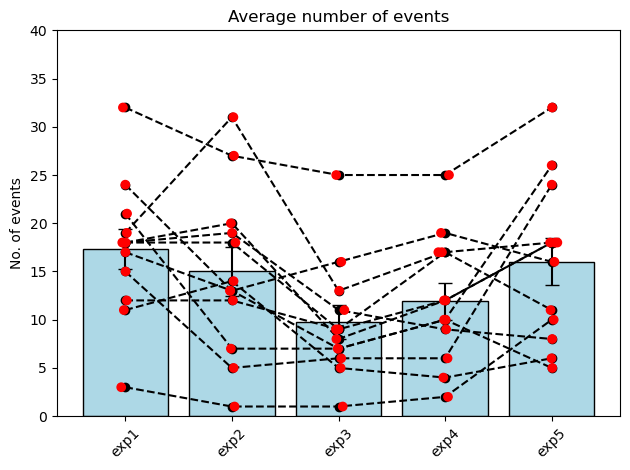

In [95]:
total_events = event_overview[event_overview['level_1'] == 'no_events']
total_event_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = total_events[event].mean()
        sem_event = sem(total_events[event])
        total_event_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
total_event_averages

data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['no_events'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

print(subjects)
x = np.arange(len(avg_events))
labels = total_event_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

plt.xticks(x, labels, rotation = 45)
plt.ylabel('No. of events')
plt.title('Average number of events')
plt.ylim([0,40])
# Show the plot
plt.tight_layout()
plt.show()

### average event length

['11_cage_p1_aggregated', '12_cage_p1_aggregated', '13_cage_p1_aggregated', '21_cage_p1_aggregated', '22_cage_p1_aggregated', '23_cage_p1_aggregated', '24_cage_p1_aggregated', '31_cage_p1_aggregated', '32_cage_p1_aggregated', '33_cage_p1_aggregated', '41_cage_p1_aggregated', '44_cage_p1_aggregated']
['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
(5, 12)
(5, 12)
['11_cage_p1_aggregated', '12_cage_p1_aggregated', '13_cage_p1_aggregated', '21_cage_p1_aggregated', '22_cage_p1_aggregated', '23_cage_p1_aggregated', '24_cage_p1_aggregated', '31_cage_p1_aggregated', '32_cage_p1_aggregated', '33_cage_p1_aggregated', '41_cage_p1_aggregated', '44_cage_p1_aggregated']


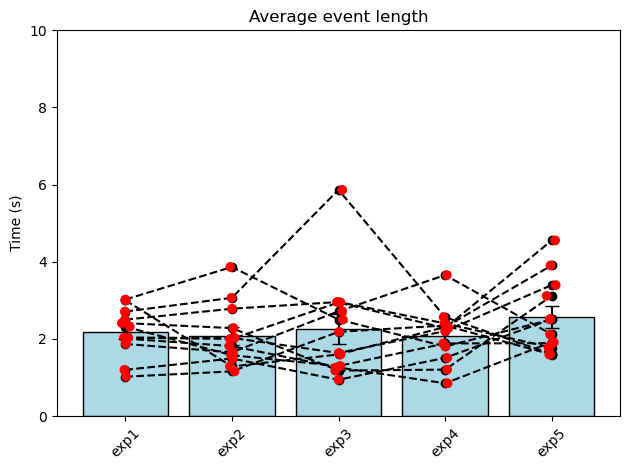

In [96]:
total_events = event_overview[event_overview['level_1'] == 'avg event']
total_event_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = total_events[event].mean()
        sem_event = sem(total_events[event])
        total_event_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
total_event_averages

data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['avg event'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

print(subjects)
x = np.arange(len(avg_events))
labels = total_event_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

plt.xticks(x, labels, rotation = 45)
plt.ylabel('Time (s)')
plt.title('Average event length')
plt.ylim([0,10])
# Show the plot
plt.tight_layout()
plt.show()

# Novel data

In [97]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
subject_info = {}
for subject, behavior_dict in novel_dicts.items():
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if subject in event_info.keys():
            dict_event = event_info[subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[subject] =  dict_event
        else:
            event_info[subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs)
print(event_info)

event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview
event_temp = event_overview.drop('level_0', axis = 1)
event_overview_averages = event_temp.groupby('level_1').mean()
event_overview_averages


0
1123
{'11_nov_p1_aggregated': {'exp1': {'no_events': 20, 'avg event': np.float64(8.1506), 'total time': np.float64(163.012)}, 'exp2': {'no_events': 20, 'avg event': np.float64(3.7233500000000057), 'total time': np.float64(74.46700000000011)}, 'exp3': {'no_events': 23, 'avg event': np.float64(1.953608695652174), 'total time': np.float64(44.933)}, 'exp4': {'no_events': 13, 'avg event': np.float64(1.630923076923077), 'total time': np.float64(21.202)}, 'exp5': {'no_events': 23, 'avg event': np.float64(2.7391304347825884), 'total time': np.float64(62.99999999999953)}}, '12_nov_p1_aggregated': {'exp1': {'no_events': 28, 'avg event': np.float64(5.87125), 'total time': np.float64(164.395)}, 'exp2': {'no_events': 10, 'avg event': np.float64(2.8601), 'total time': np.float64(28.601)}, 'exp3': {'no_events': 7, 'avg event': np.float64(3.1904285714285714), 'total time': np.float64(22.333)}, 'exp4': {'no_events': 4, 'avg event': np.float64(2.9495), 'total time': np.float64(11.798)}, 'exp5': {'no_e

exp1       exp2       exp3       exp4       exp5
level_1                                                          
avg event     4.49173   2.982725   2.389368   2.386170   3.965023
no_events    23.75000  16.750000  17.166667  13.333333  22.583333
total time  106.65825  49.084250  39.952750  30.027500  86.362583

In [98]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'exp1': np.float64(106.65825000000001),
 'exp2': np.float64(49.084250000000026),
 'exp3': np.float64(39.95275),
 'exp4': np.float64(30.02749999999998),
 'exp5': np.float64(86.36258333333338)}

In [99]:
data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['total time'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

['11_nov_p1_aggregated', '12_nov_p1_aggregated', '13_nov_p1_aggregated', '21_nov_p1_aggregated', '22_nov_p1_aggregated', '23_nov_p1_aggregated', '24_nov_p1_aggregated', '31_nov_p1_aggregated', '32_nov_p1_aggregated', '33_nov_p1_aggregated', '41_nov_p1_aggregated', '44_nov_p1_aggregated']
['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
(5, 12)
(5, 12)


['11_nov_p1_aggregated', '12_nov_p1_aggregated', '13_nov_p1_aggregated', '21_nov_p1_aggregated', '22_nov_p1_aggregated', '23_nov_p1_aggregated', '24_nov_p1_aggregated', '31_nov_p1_aggregated', '32_nov_p1_aggregated', '33_nov_p1_aggregated', '41_nov_p1_aggregated', '44_nov_p1_aggregated']


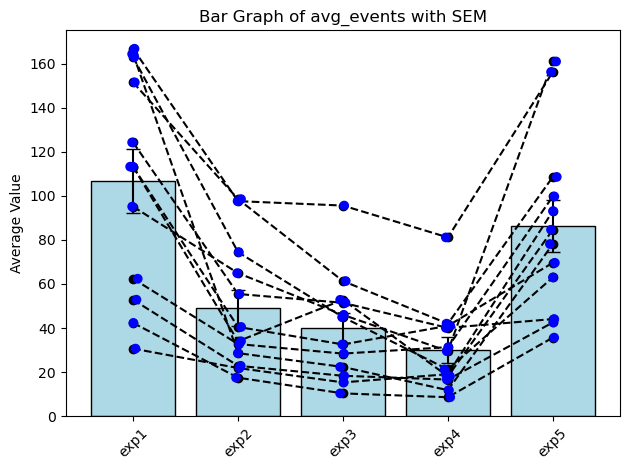

In [100]:
print(subjects)
x = np.arange(len(avg_events))
labels = event_agent_time_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)


# Add labels and title
plt.xticks(x, labels, rotation = 45)
plt.ylabel('Average Value')
plt.title('Bar Graph of avg_events with SEM')

# Show the plot
plt.tight_layout()
plt.show()


['11_nov_p1_aggregated', '12_nov_p1_aggregated', '13_nov_p1_aggregated', '21_nov_p1_aggregated', '22_nov_p1_aggregated', '23_nov_p1_aggregated', '24_nov_p1_aggregated', '31_nov_p1_aggregated', '32_nov_p1_aggregated', '33_nov_p1_aggregated', '41_nov_p1_aggregated', '44_nov_p1_aggregated']
['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
(5, 12)
(5, 12)
['11_nov_p1_aggregated', '12_nov_p1_aggregated', '13_nov_p1_aggregated', '21_nov_p1_aggregated', '22_nov_p1_aggregated', '23_nov_p1_aggregated', '24_nov_p1_aggregated', '31_nov_p1_aggregated', '32_nov_p1_aggregated', '33_nov_p1_aggregated', '41_nov_p1_aggregated', '44_nov_p1_aggregated']


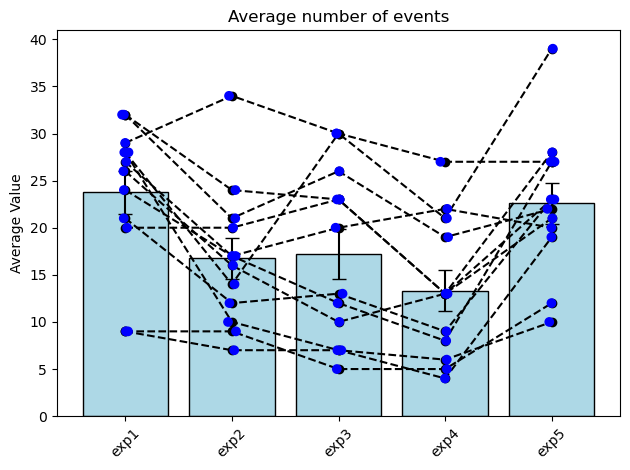

In [101]:
total_events = event_overview[event_overview['level_1'] == 'no_events']
total_event_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = total_events[event].mean()
        sem_event = sem(total_events[event])
        total_event_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
total_event_averages

data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['no_events'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

print(subjects)
x = np.arange(len(avg_events))
labels = total_event_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

plt.xticks(x, labels, rotation = 45)
plt.ylabel('Average Value')
plt.title('Average number of events')
#plt.ylim([0,0])
# Show the plot
plt.tight_layout()
plt.show()

['11_nov_p1_aggregated', '12_nov_p1_aggregated', '13_nov_p1_aggregated', '21_nov_p1_aggregated', '22_nov_p1_aggregated', '23_nov_p1_aggregated', '24_nov_p1_aggregated', '31_nov_p1_aggregated', '32_nov_p1_aggregated', '33_nov_p1_aggregated', '41_nov_p1_aggregated', '44_nov_p1_aggregated']
['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
(5, 12)
(5, 12)
['11_nov_p1_aggregated', '12_nov_p1_aggregated', '13_nov_p1_aggregated', '21_nov_p1_aggregated', '22_nov_p1_aggregated', '23_nov_p1_aggregated', '24_nov_p1_aggregated', '31_nov_p1_aggregated', '32_nov_p1_aggregated', '33_nov_p1_aggregated', '41_nov_p1_aggregated', '44_nov_p1_aggregated']


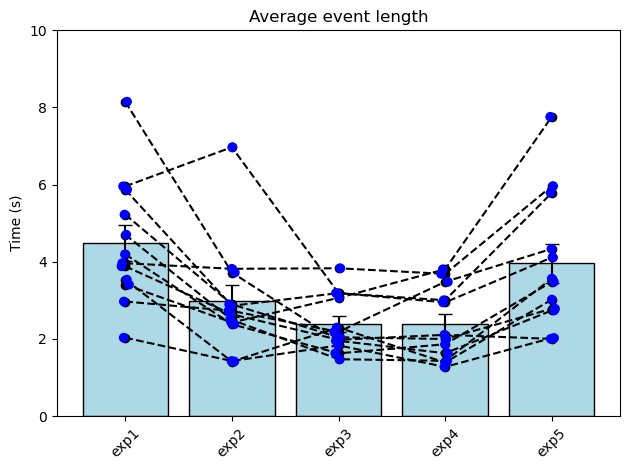

In [102]:
total_events = event_overview[event_overview['level_1'] == 'avg event']
total_event_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = total_events[event].mean()
        sem_event = sem(total_events[event])
        total_event_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
total_event_averages

data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['avg event'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors[0:5])
print(data_points.shape)
print(data_points.shape)

print(subjects)
x = np.arange(len(avg_events))
labels = total_event_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    
    # Create separate colors for each subject based on pattern
    colors = ['red' if 'cage' in str(subject).lower() else 
              'blue' if 'nov' in str(subject).lower() else 
              'gray' for subject in subjects]
    
    plt.scatter([i + jitter_val for jitter_val in jitter], 
                group_data, 
                color=colors, 
                zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

plt.xticks(x, labels, rotation = 45)
plt.ylabel('Time (s)')
plt.title('Average event length')
plt.ylim([0,10])
# Show the plot
plt.tight_layout()
plt.show()

In [439]:
def get_inter_event_intervals(dict_events, event_A, event_B):
    """
    Calculate intervals between end of event_A and start of next event_B
    
    Parameters:
    - dict_events: Dictionary containing event arrays
    - event_A: Name of first event type
    - event_B: Name of second event type
    
    Returns:
    - intervals: Array of time intervals between end of A and start of next B
    """
    # Check if both event types exist and aren't empty
    if event_A not in dict_events or event_B not in dict_events:
        return np.array([])
    if dict_events[event_A][0].size == 0 or dict_events[event_B][0].size == 0:
        return np.array([])
        
    # Get arrays for both event types
    events_A = dict_events[event_A]
    events_B = dict_events[event_B]
    
    intervals = []
    
    # For each A event
    for a_start, a_end in events_A:
        # Find next B event that starts after this A ends
        next_b_starts = events_B[:, 0][events_B[:, 0] > a_end]
        if len(next_b_starts) > 0:
            # Calculate interval to next B event
            interval = next_b_starts[0] - a_end
            intervals.append(interval)
            
    return np.array(intervals)

In [440]:
neg_to_pos = {}
pos_to_neg = {}
for recording, dict in behavior_dicts.items():
    neg_to_pos[recording] = {}
    pos_to_neg[recording] = {}
    for exp in ['exp1', 'exp2', 'exp3', 'exp4', 'exp5']:
        neg_to_pos[recording][f'{exp} sniff to neg'] = get_inter_event_intervals(dict, event_A = f'{exp} sniff', event_B = f'{exp} aversive')
        pos_to_neg[recording][f'{exp} neg to sniff'] = get_inter_event_intervals(dict, event_A = f'{exp} aversive', event_B = f'{exp} sniff')
        

In [441]:
data = []

# Iterate through recordings and experiments
for recording in neg_to_pos.keys():
    for exp in ['exp1', 'exp2', 'exp3', 'exp4', 'exp5']:
        # Get arrays for both directions
        sniff_to_neg = neg_to_pos[recording][f'{exp} sniff to neg']
        neg_to_sniff = pos_to_neg[recording][f'{exp} neg to sniff']
        
        # Add data for sniff to negative transitions
        if sniff_to_neg.size > 0:  # If there are intervals
            for interval in sniff_to_neg:
                data.append({
                    'recording': recording,
                    'experiment': exp,
                    'transition_type': 'sniff_to_neg',
                    'interval': interval
                })
        
        # Add data for negative to sniff transitions
        if neg_to_sniff.size > 0:  # If there are intervals
            for interval in neg_to_sniff:
                data.append({
                    'recording': recording,
                    'experiment': exp,
                    'transition_type': 'neg_to_sniff',
                    'interval': interval
                })

# Create DataFrame
df = pd.DataFrame(data)
df

recording experiment transition_type  interval
0    11_nov_p1_aggregated       exp1    sniff_to_neg       1.0
1    11_nov_p1_aggregated       exp1    sniff_to_neg       1.0
2    11_nov_p1_aggregated       exp1    sniff_to_neg  143733.0
3    11_nov_p1_aggregated       exp1    sniff_to_neg  130067.0
4    11_nov_p1_aggregated       exp1    sniff_to_neg  120000.0
..                    ...        ...             ...       ...
235  44_nov_p1_aggregated       exp2    sniff_to_neg   23937.0
236  44_nov_p1_aggregated       exp2    sniff_to_neg   10937.0
237  44_nov_p1_aggregated       exp2    sniff_to_neg    1624.0
238  44_nov_p1_aggregated       exp2    neg_to_sniff   21875.0
239  44_nov_p1_aggregated       exp2    neg_to_sniff   42250.0

[240 rows x 4 columns]

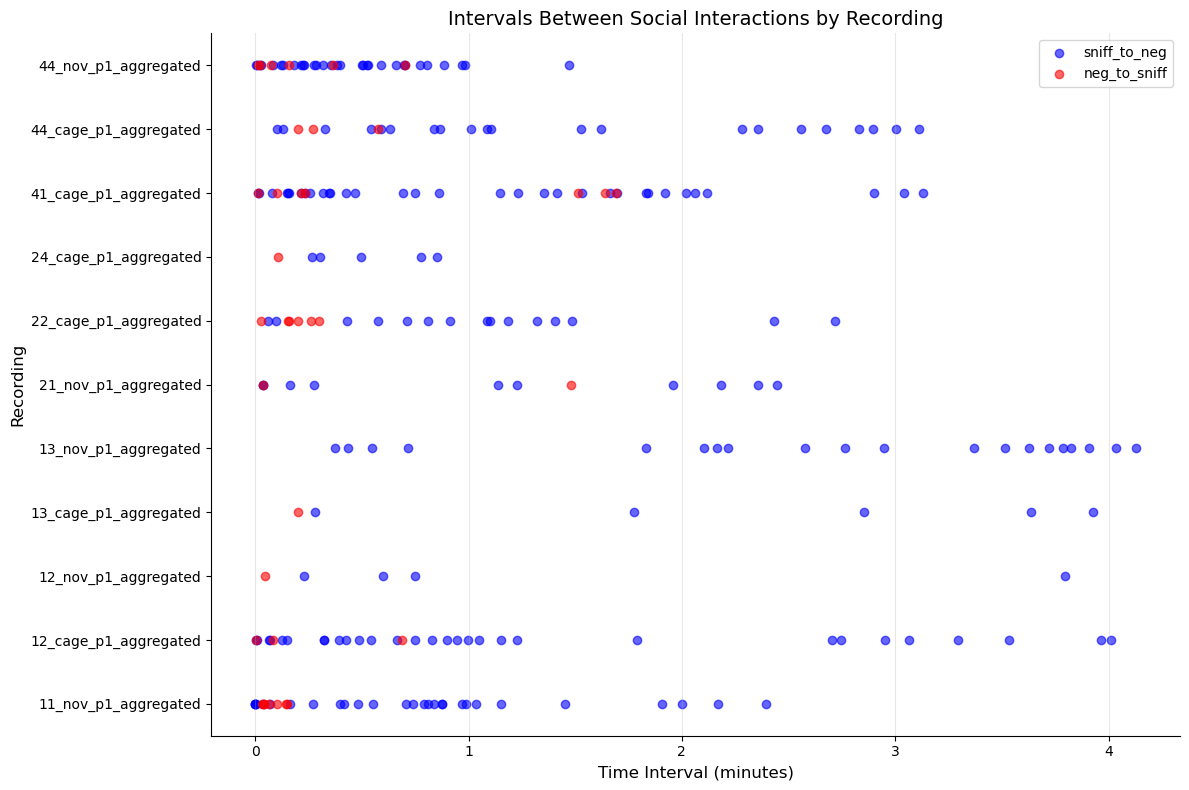

In [442]:
plt.figure(figsize=(12, 8))

# Plot settings
width = 0.35
recording_offset = 0
colors = {'sniff_to_neg': 'blue', 'neg_to_sniff': 'red'}

# Get unique recordings for y-axis
recordings = df['recording'].unique()

# Plot intervals for each recording
for recording in recordings:
    recording_data = df[df['recording'] == recording]
    
    # Plot points for each transition type
    for transition_type in ['sniff_to_neg', 'neg_to_sniff']:
        transition_data = recording_data[recording_data['transition_type'] == transition_type]
        
        # Convert intervals to minutes if they're in milliseconds or seconds
        intervals = transition_data['interval'] / 1000 / 60  # Assuming intervals are in milliseconds
        
        # Plot points
        y = [recording_offset] * len(intervals)
        plt.scatter(intervals, y, 
                   label=transition_type if recording_offset == 0 else "",  # Only label first recording
                   alpha=0.6, 
                   c=colors[transition_type])
    
    recording_offset += 1

# Customize plot
plt.yticks(range(len(recordings)), recordings)
plt.xlabel('Time Interval (minutes)', fontsize=12)
plt.ylabel('Recording', fontsize=12)
plt.title('Intervals Between Social Interactions by Recording', fontsize=14)
plt.legend()
plt.grid(True, axis='x', alpha=0.3)

# Add spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [443]:
df

recording experiment transition_type  interval
0    11_nov_p1_aggregated       exp1    sniff_to_neg       1.0
1    11_nov_p1_aggregated       exp1    sniff_to_neg       1.0
2    11_nov_p1_aggregated       exp1    sniff_to_neg  143733.0
3    11_nov_p1_aggregated       exp1    sniff_to_neg  130067.0
4    11_nov_p1_aggregated       exp1    sniff_to_neg  120000.0
..                    ...        ...             ...       ...
235  44_nov_p1_aggregated       exp2    sniff_to_neg   23937.0
236  44_nov_p1_aggregated       exp2    sniff_to_neg   10937.0
237  44_nov_p1_aggregated       exp2    sniff_to_neg    1624.0
238  44_nov_p1_aggregated       exp2    neg_to_sniff   21875.0
239  44_nov_p1_aggregated       exp2    neg_to_sniff   42250.0

[240 rows x 4 columns]

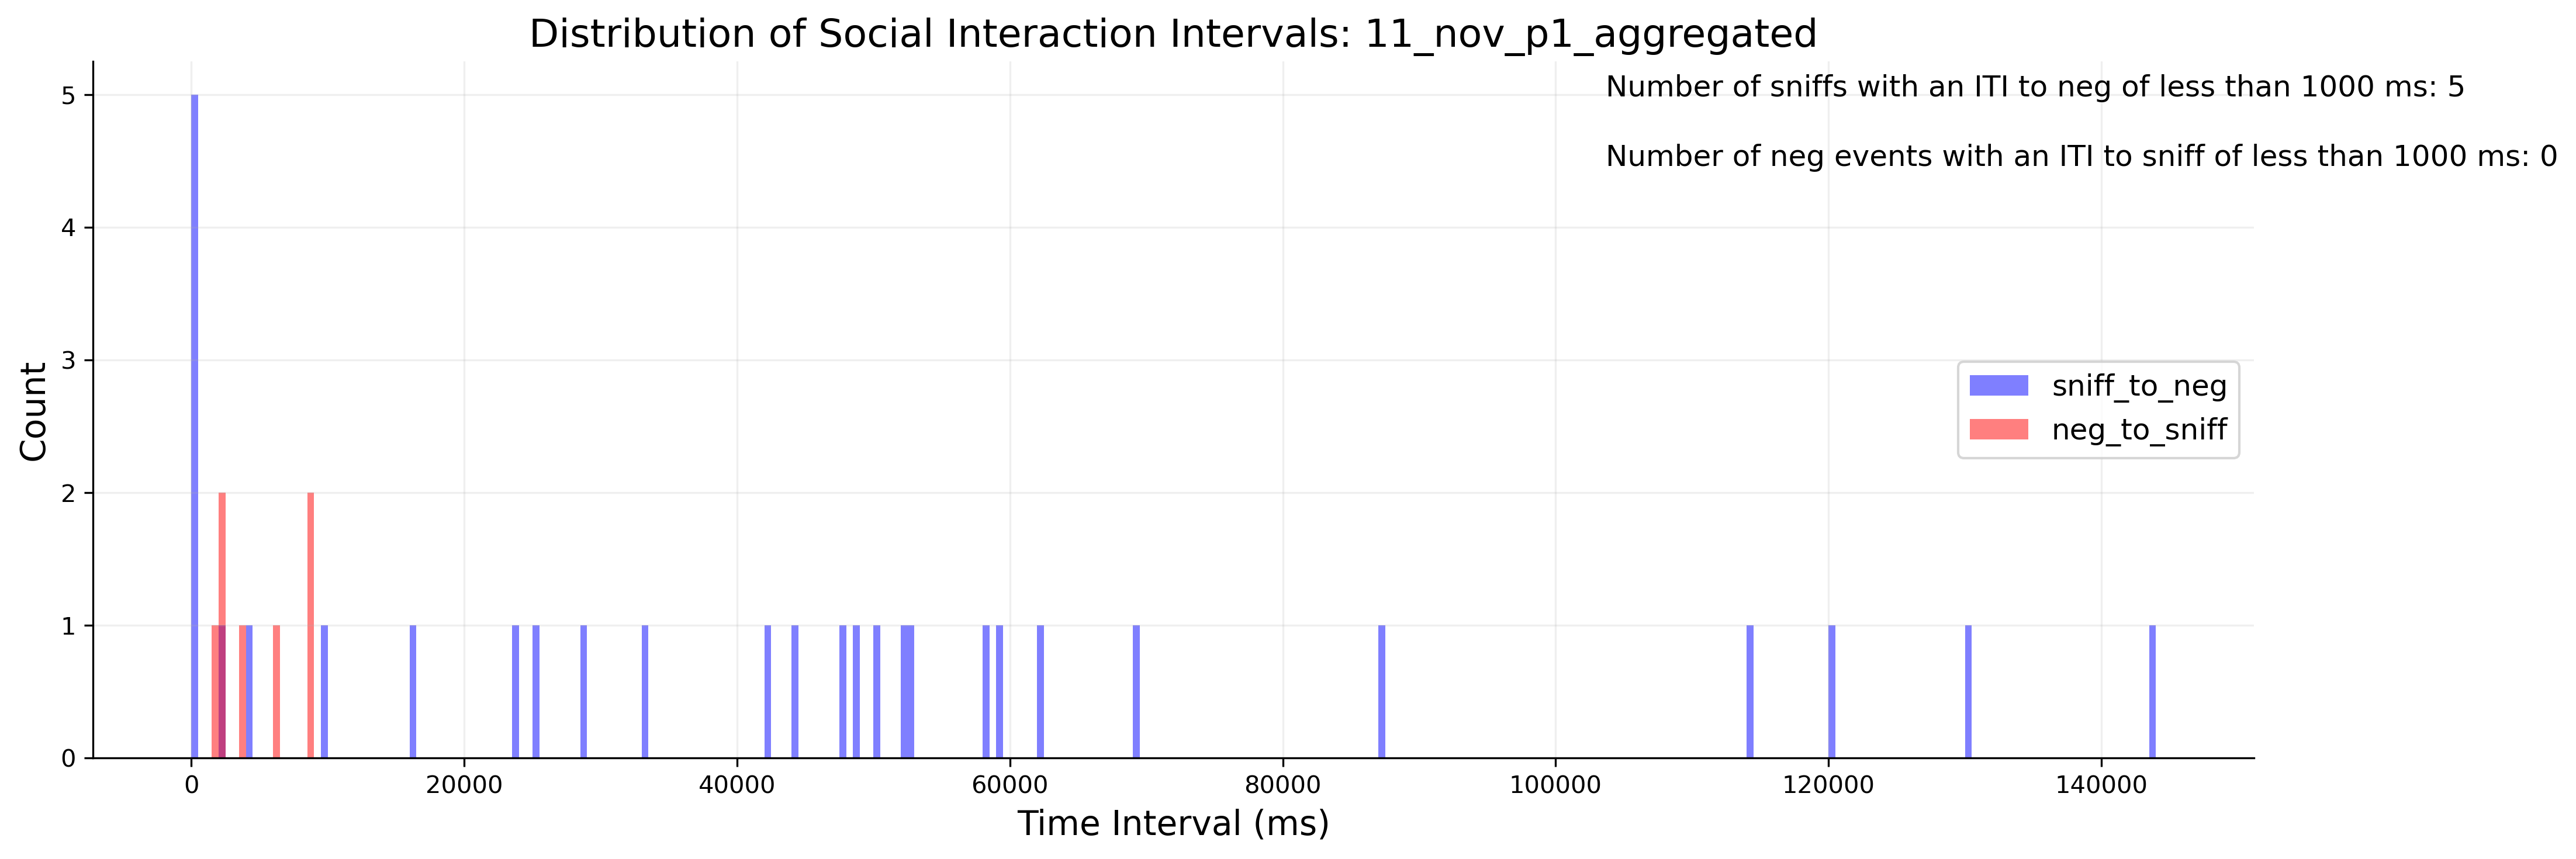

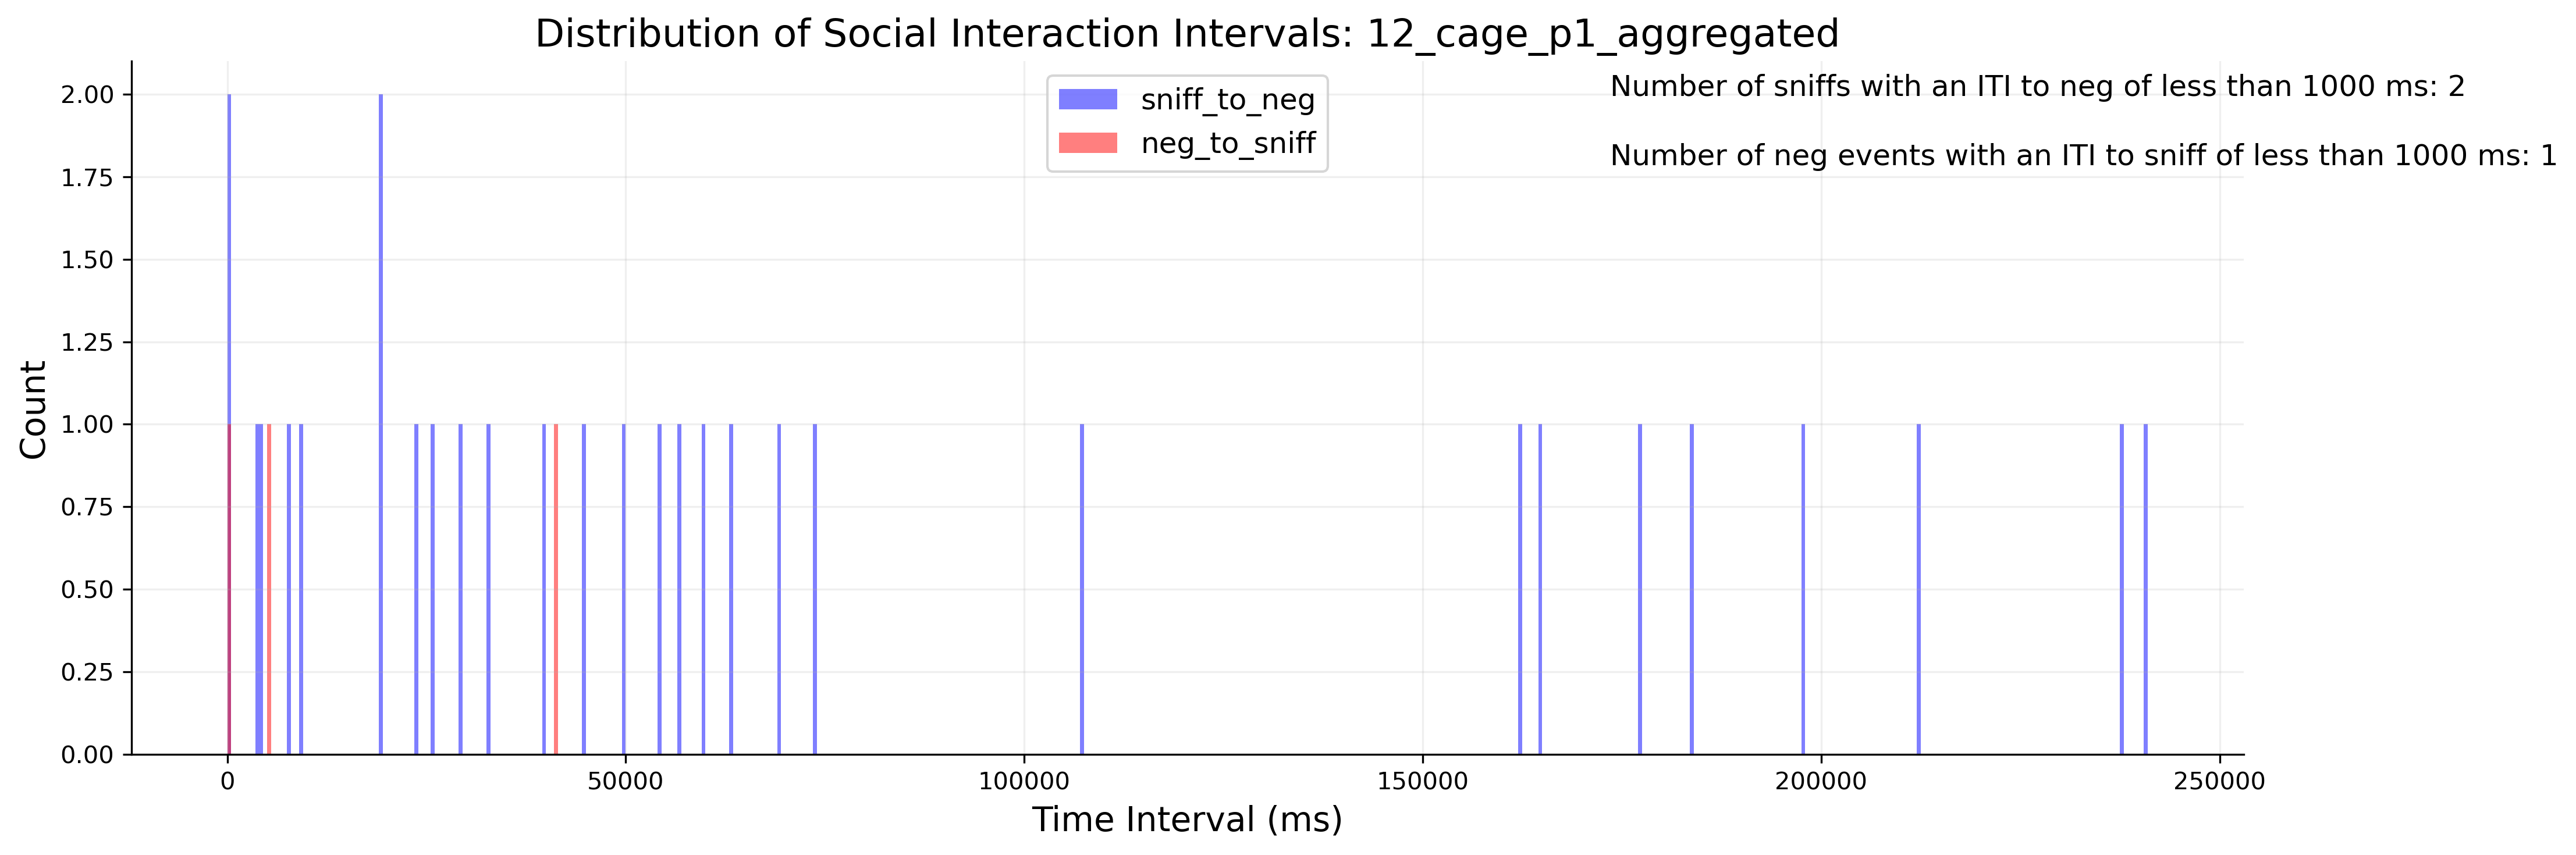

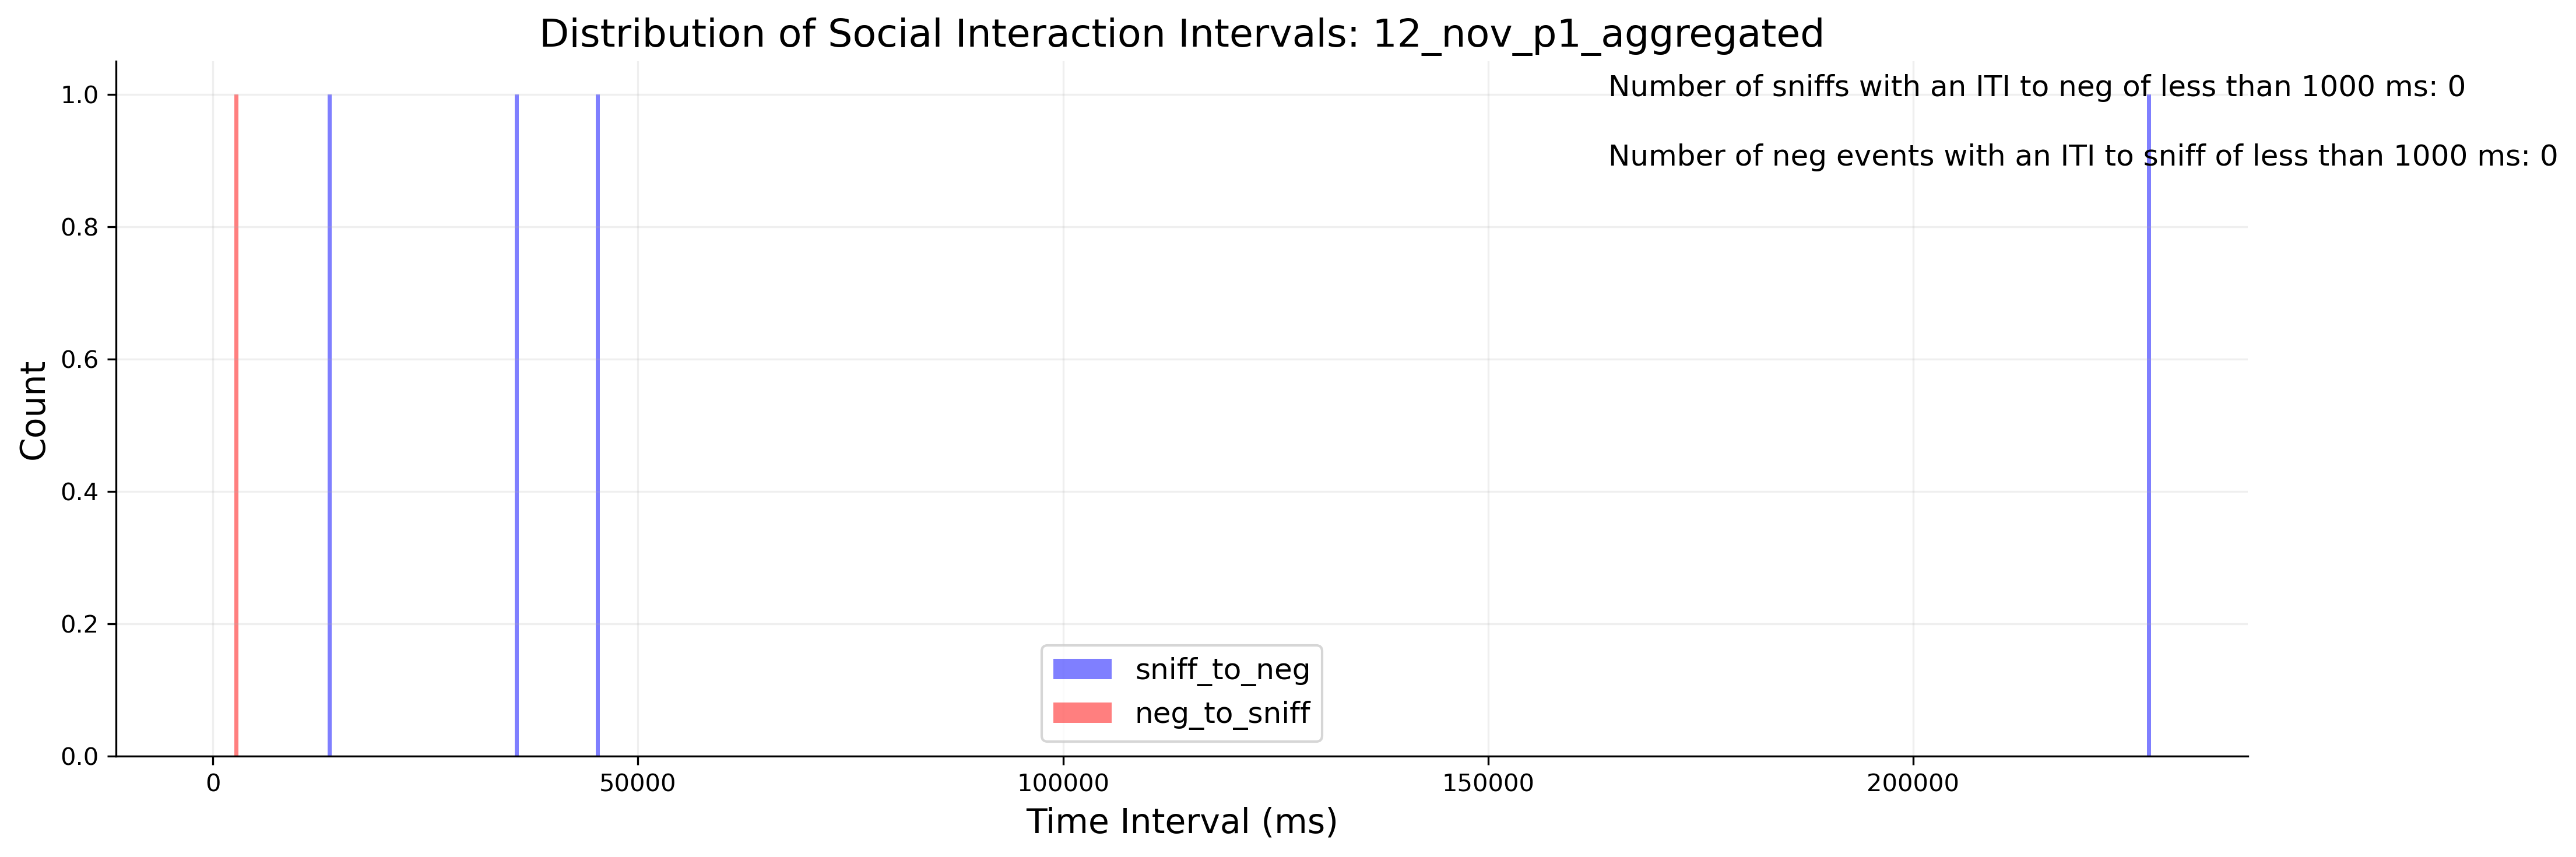

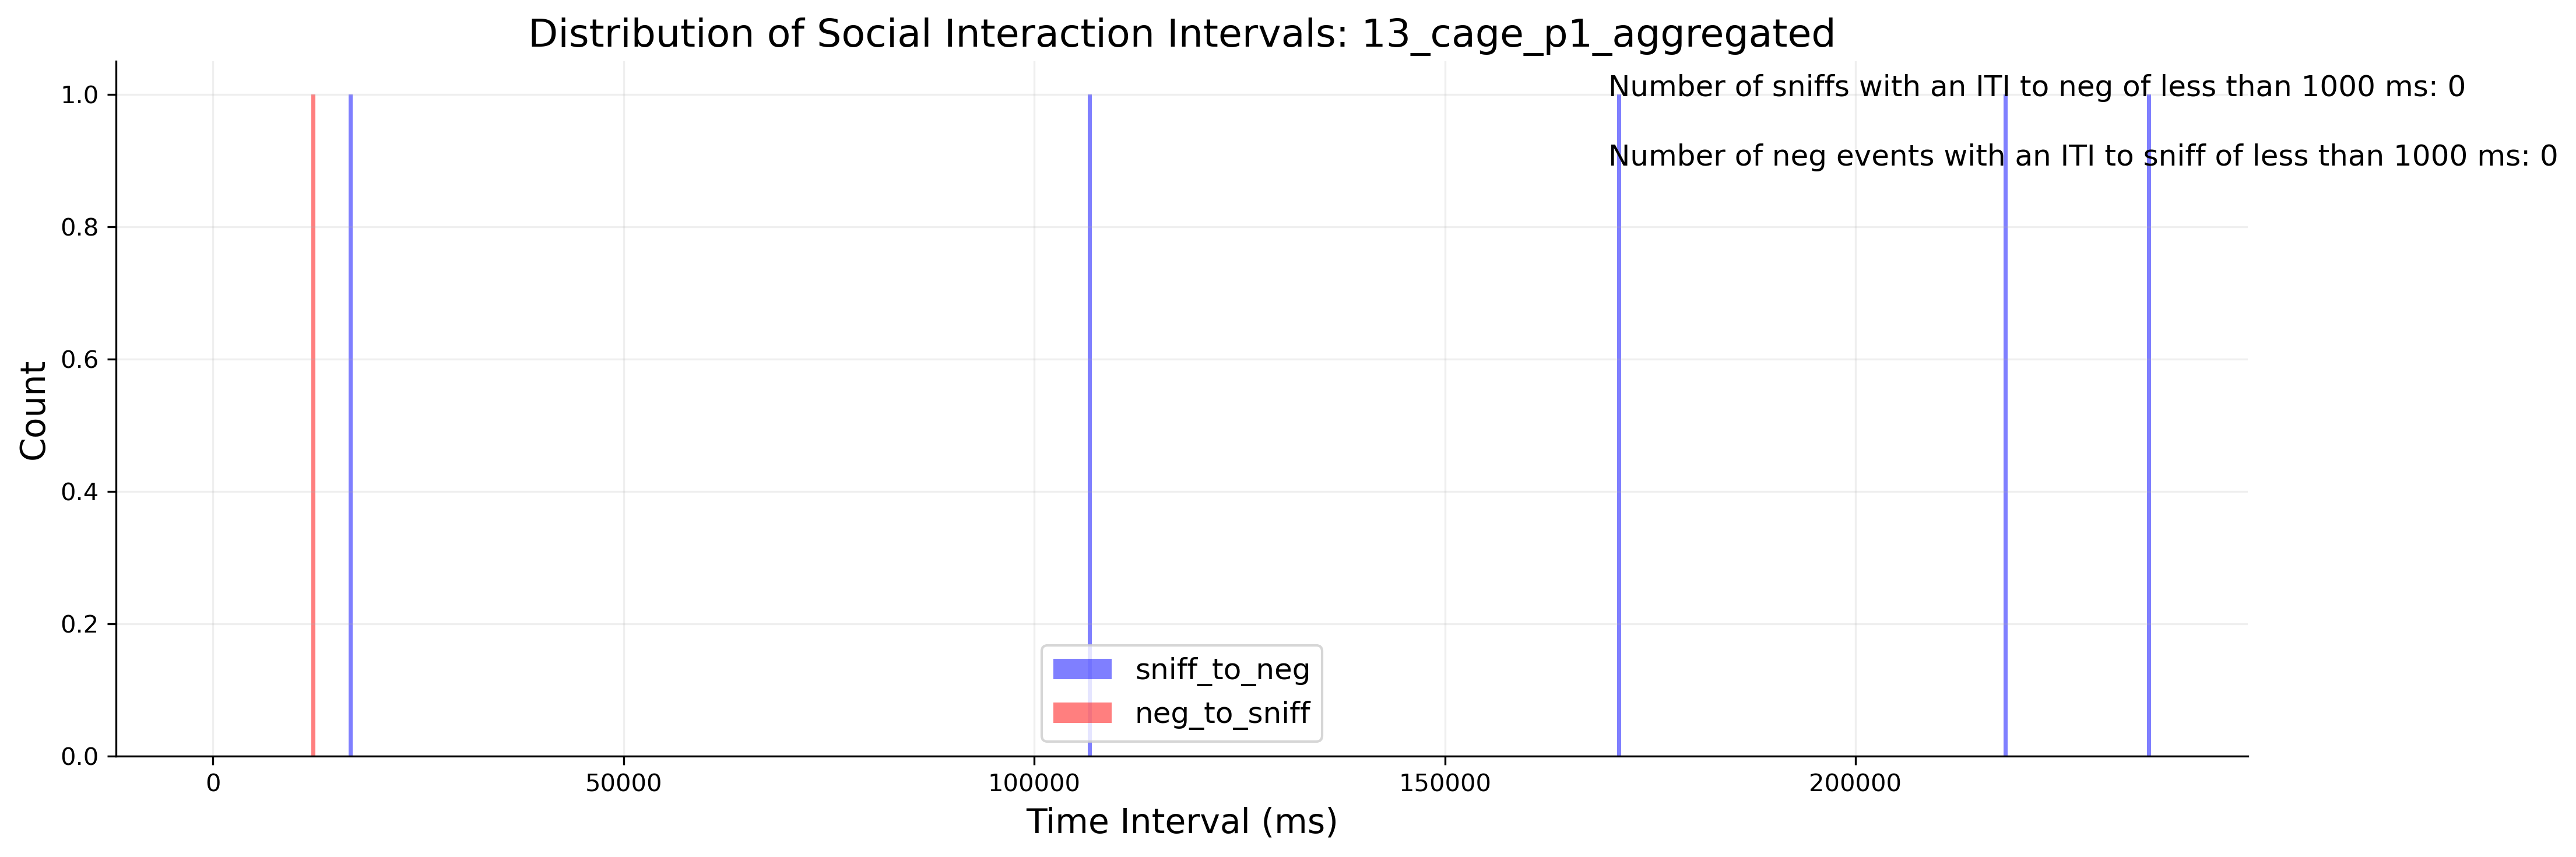

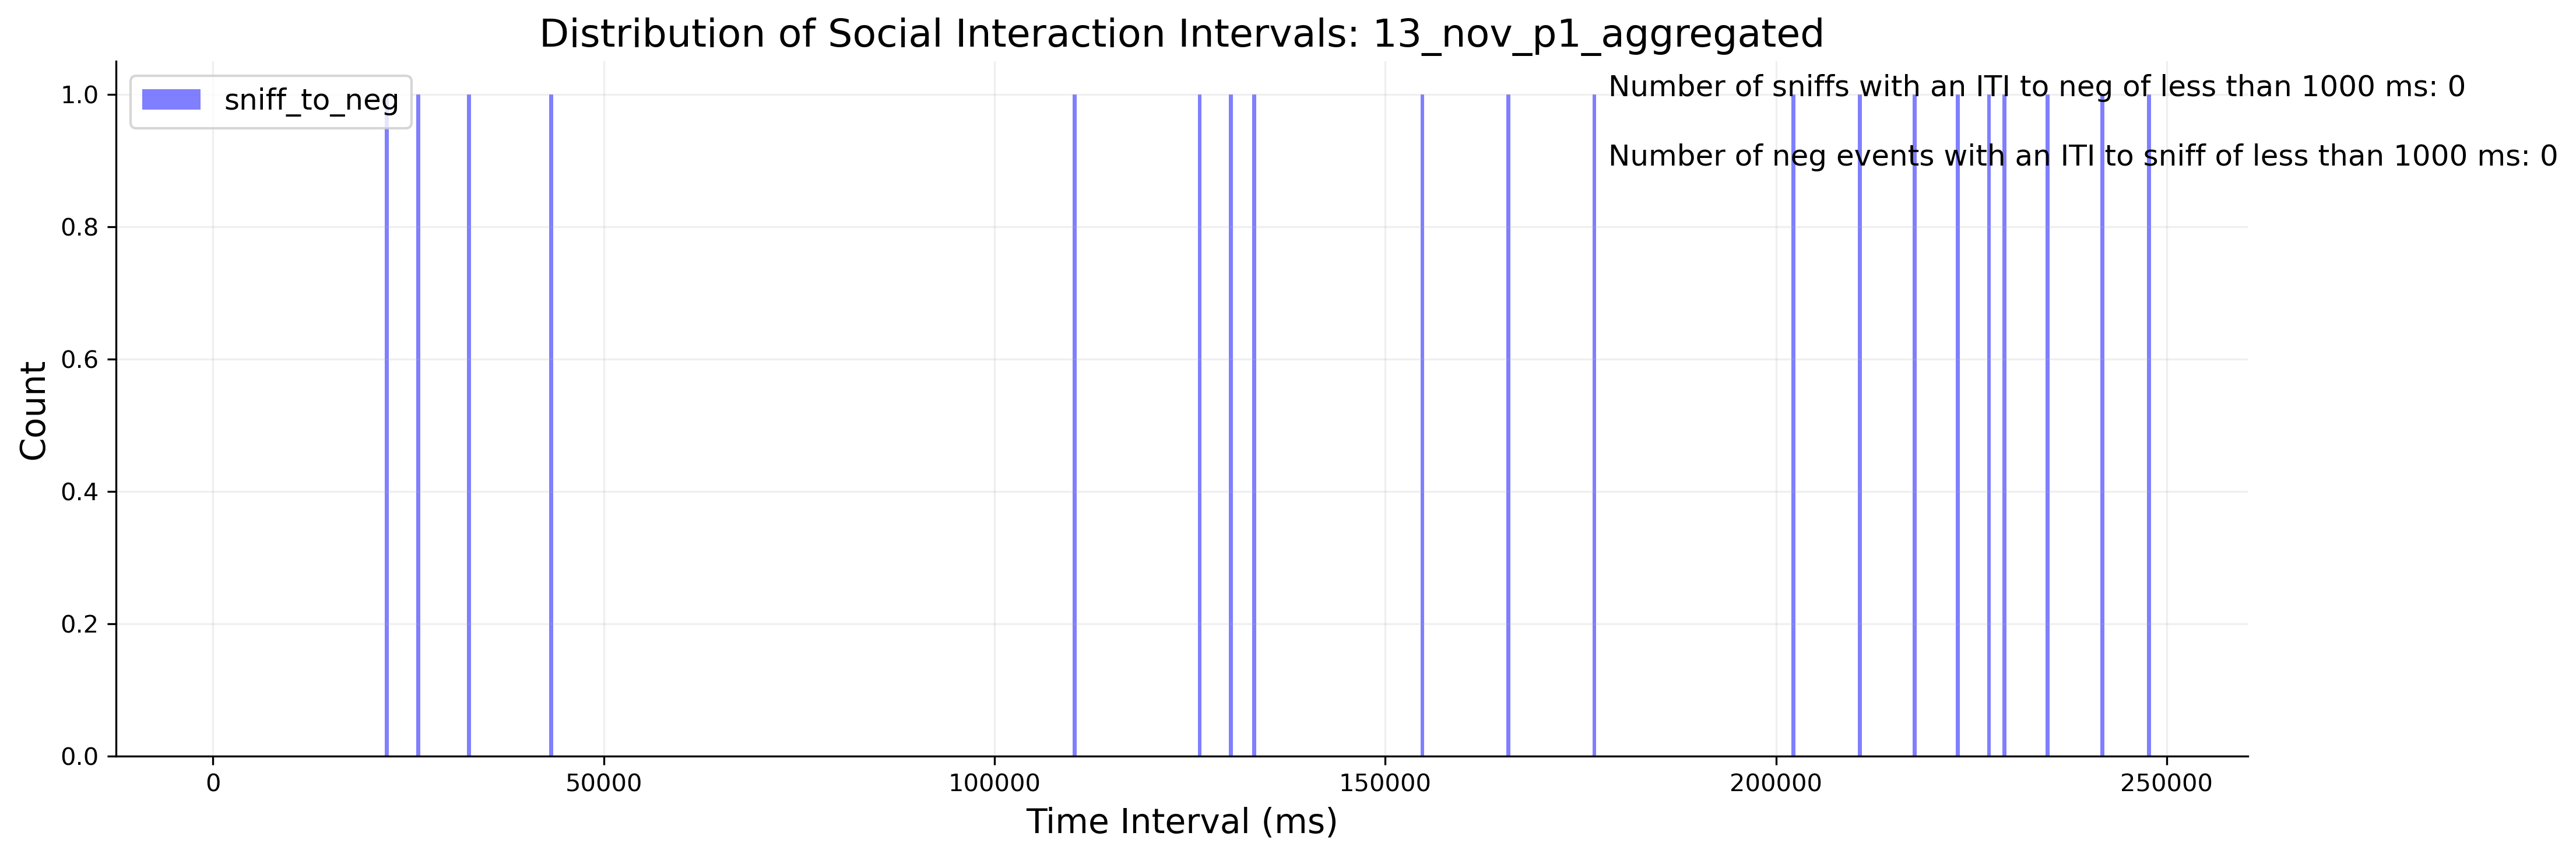

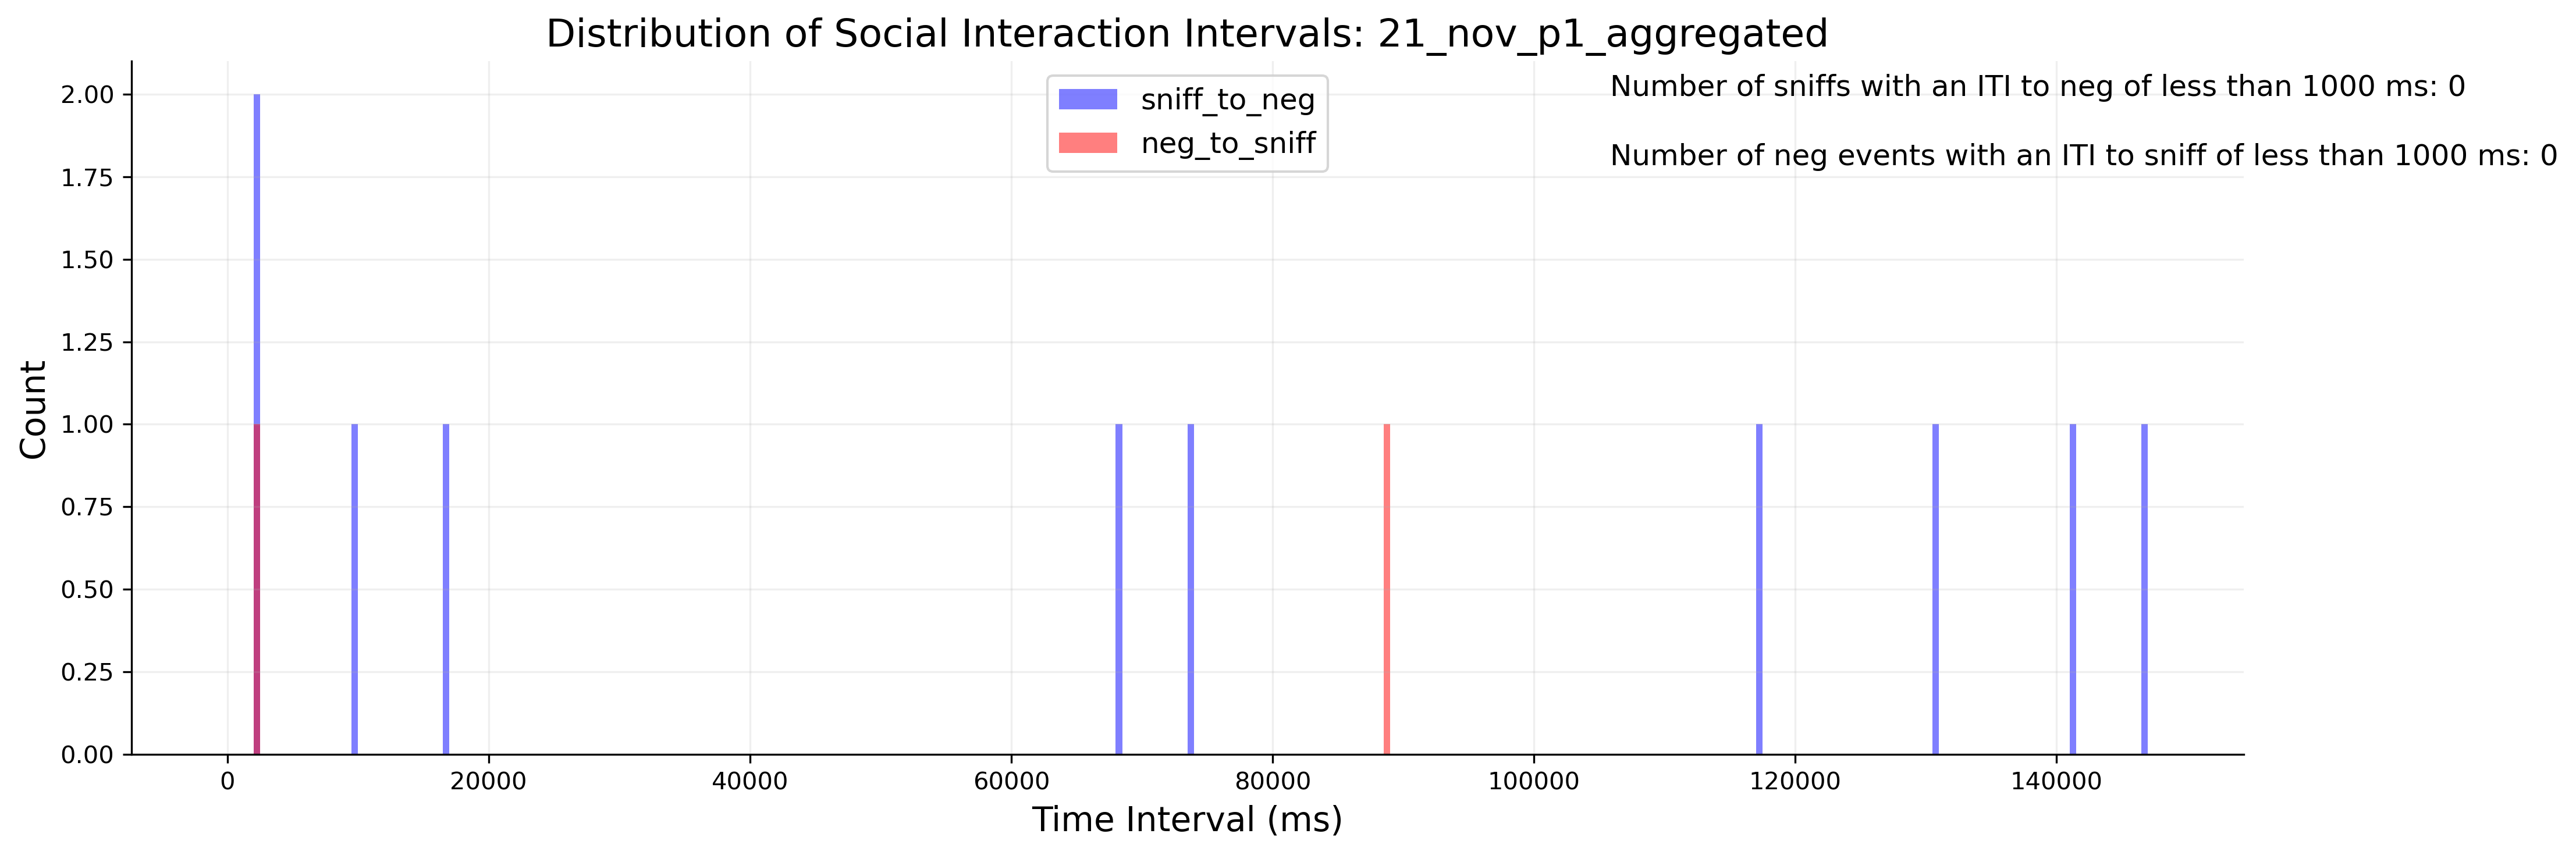

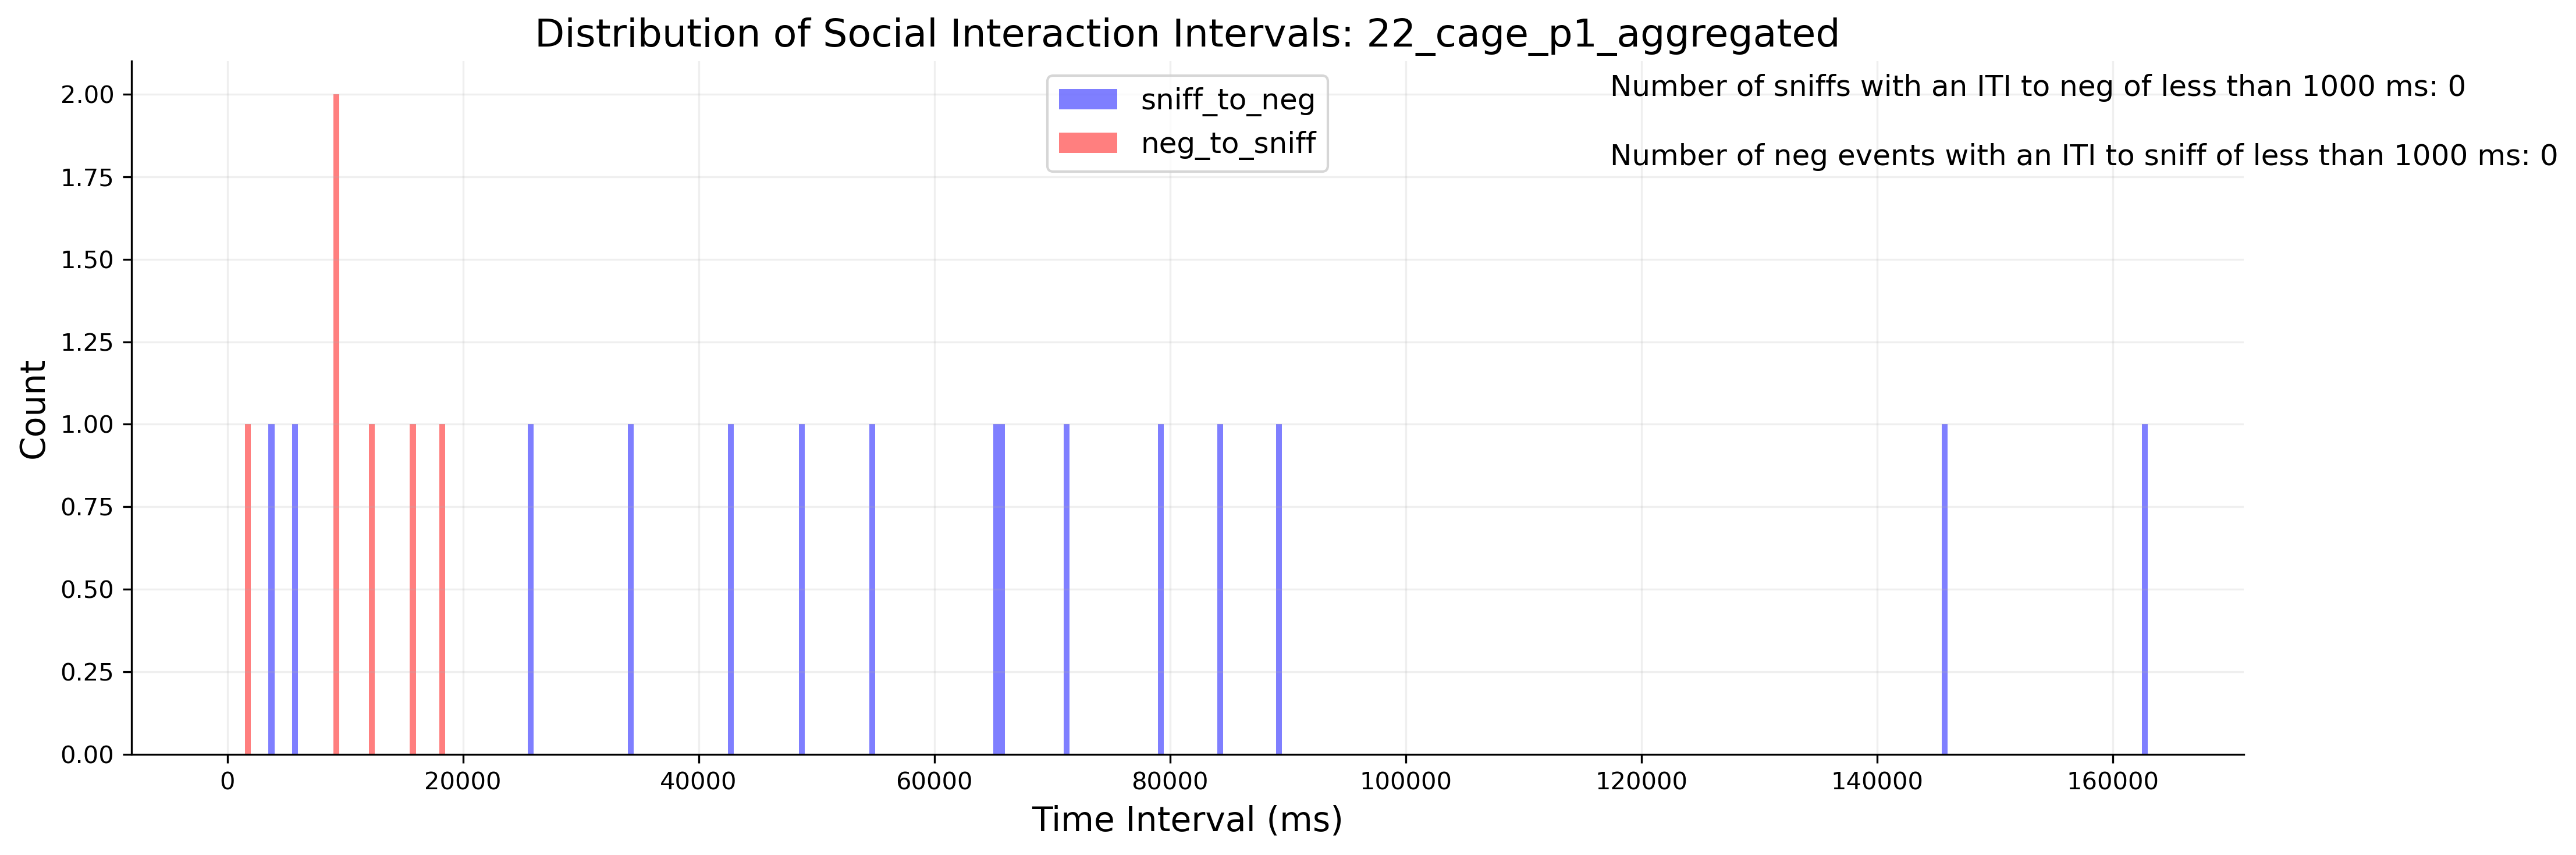

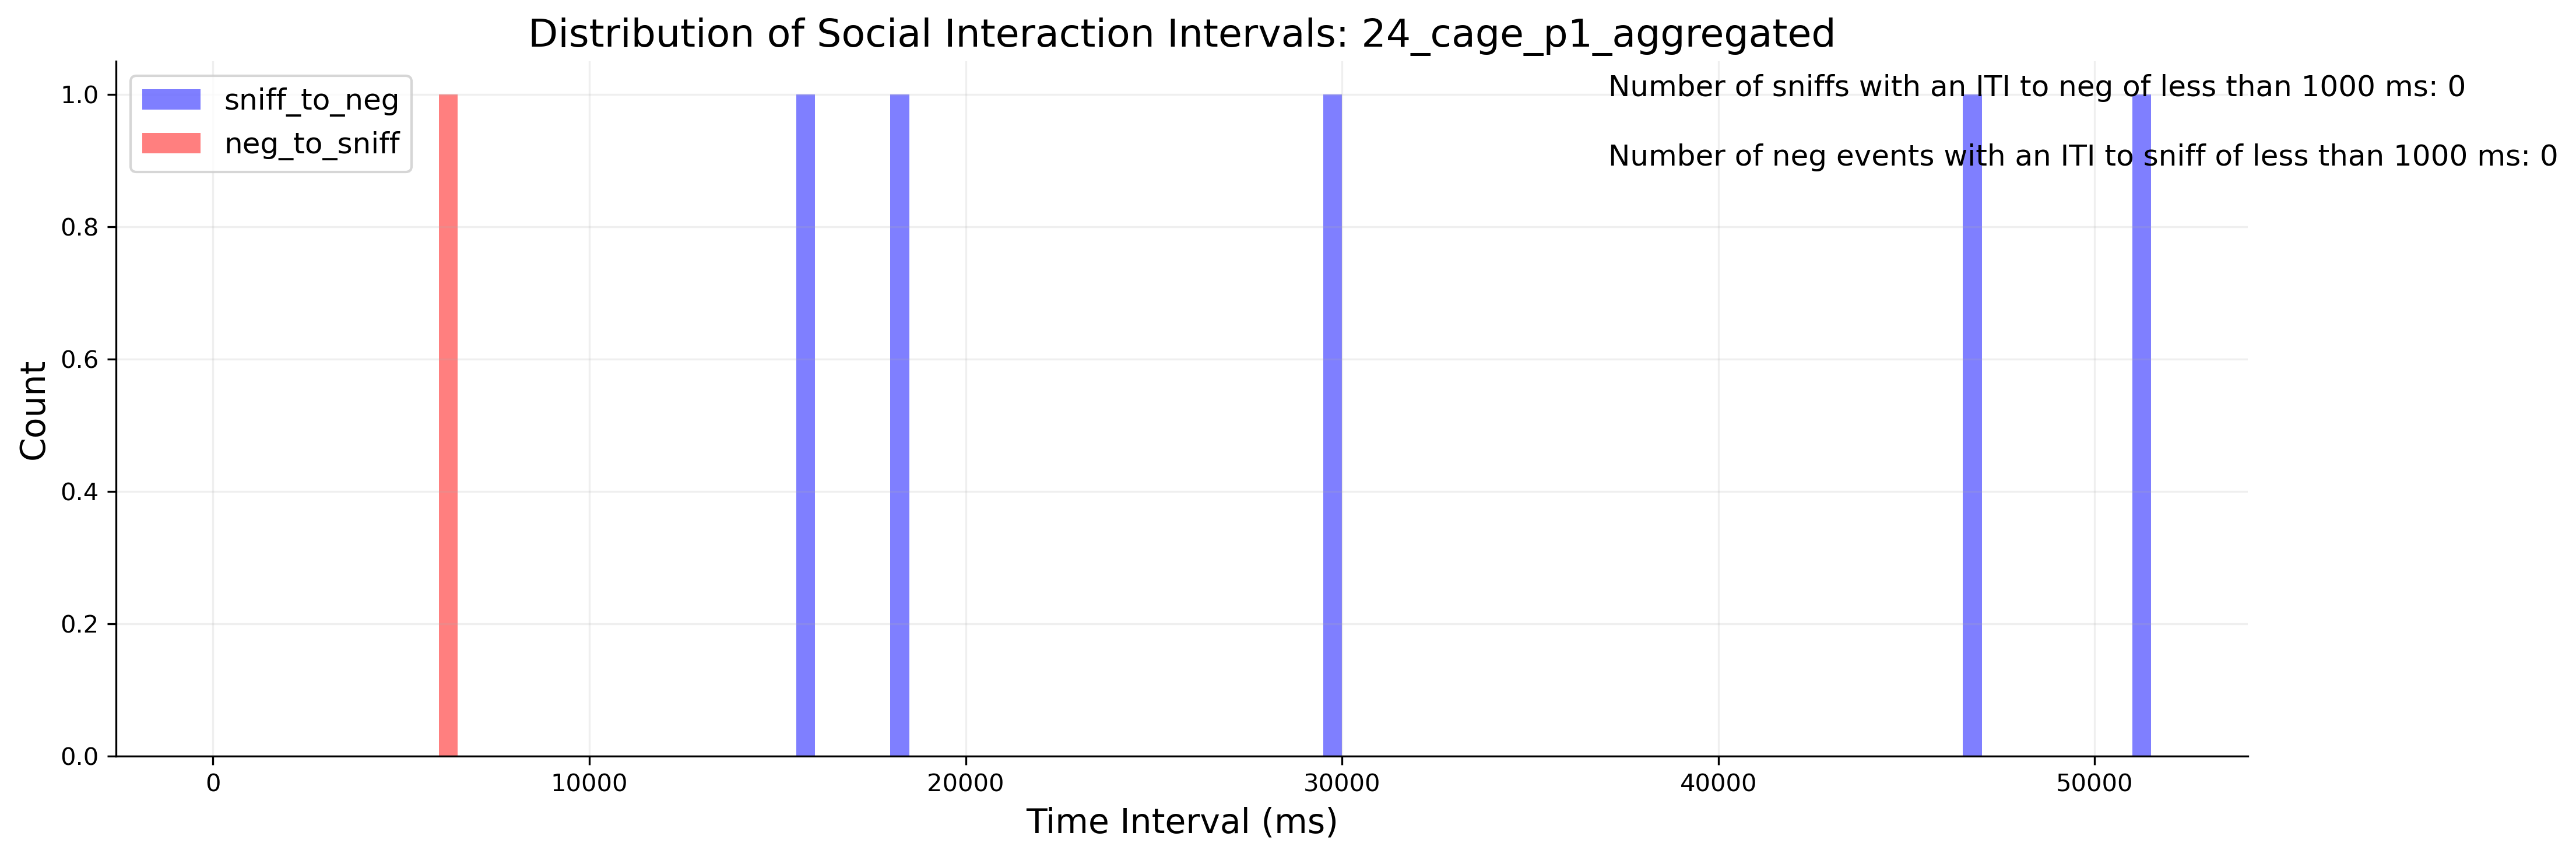

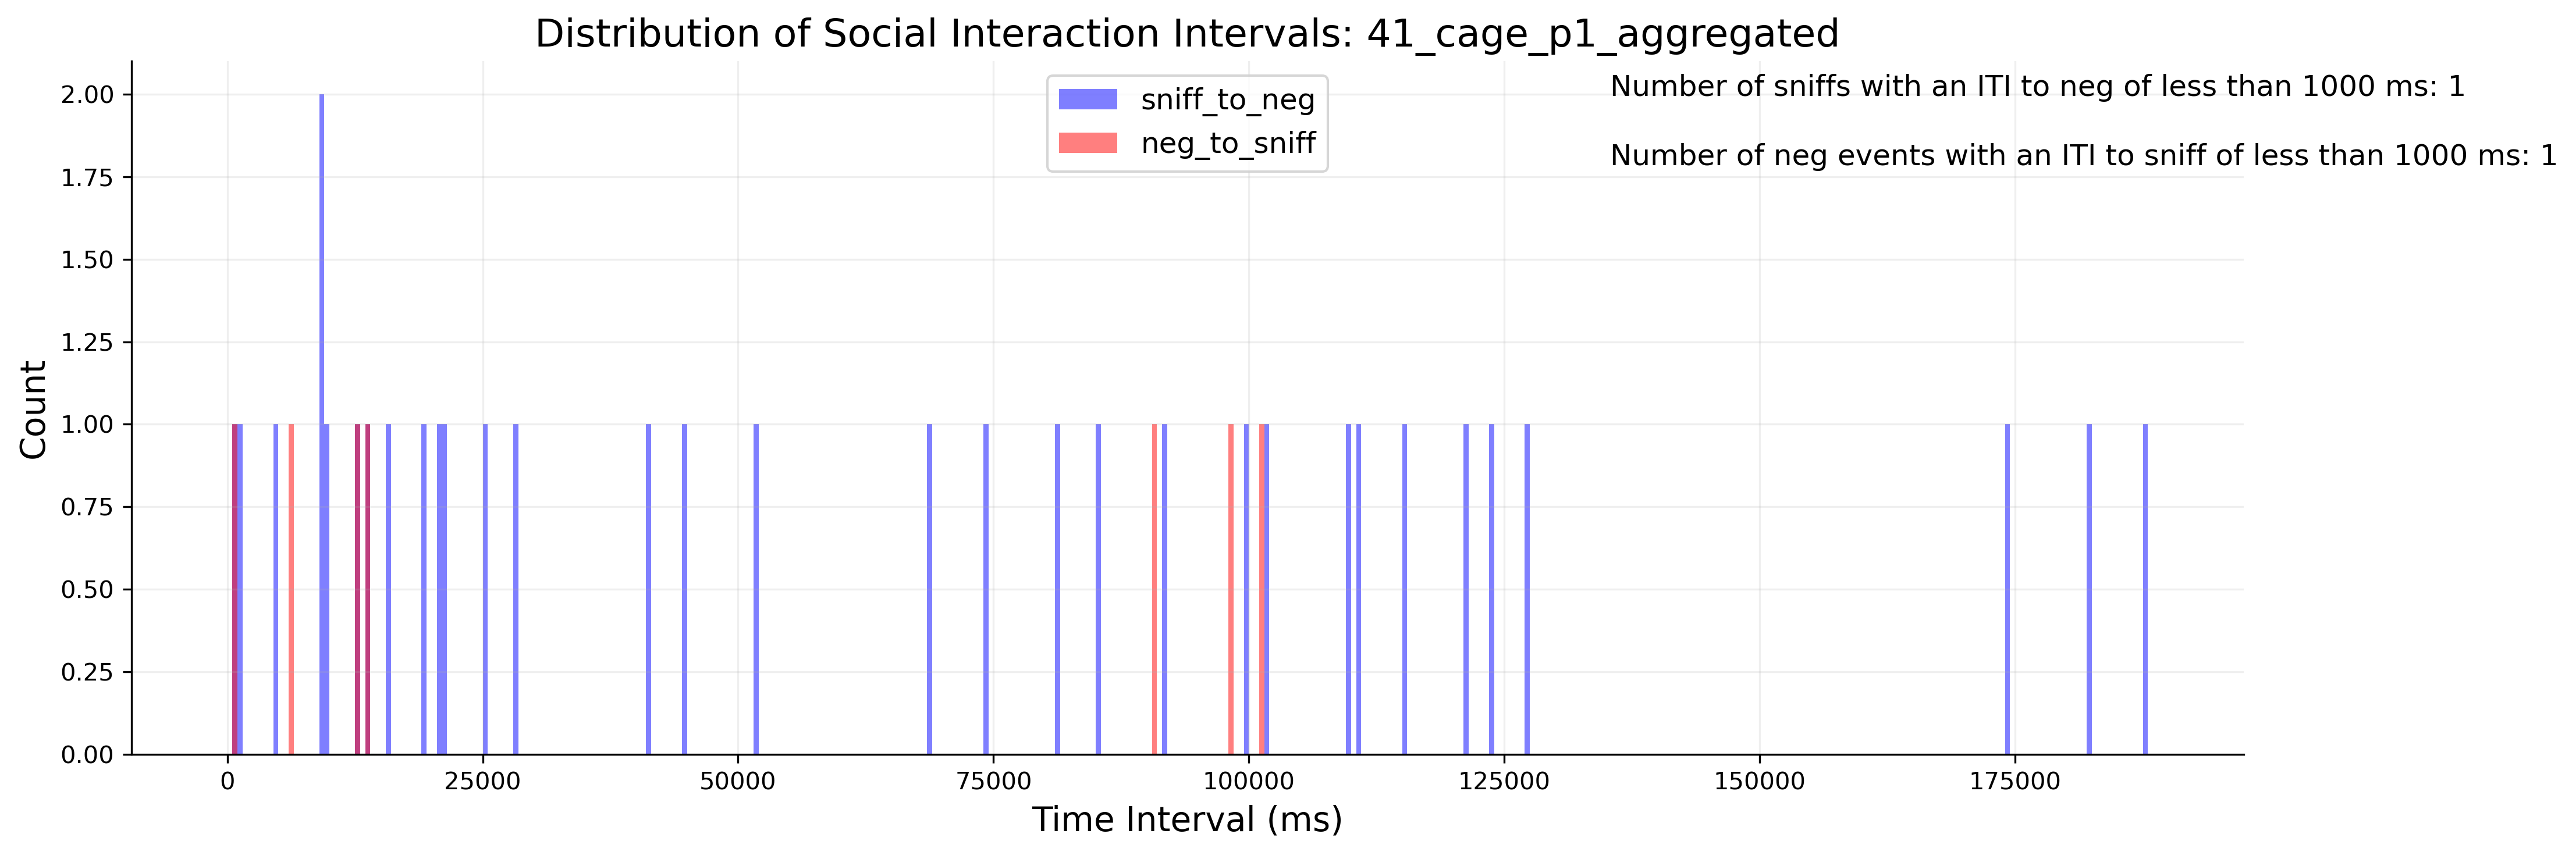

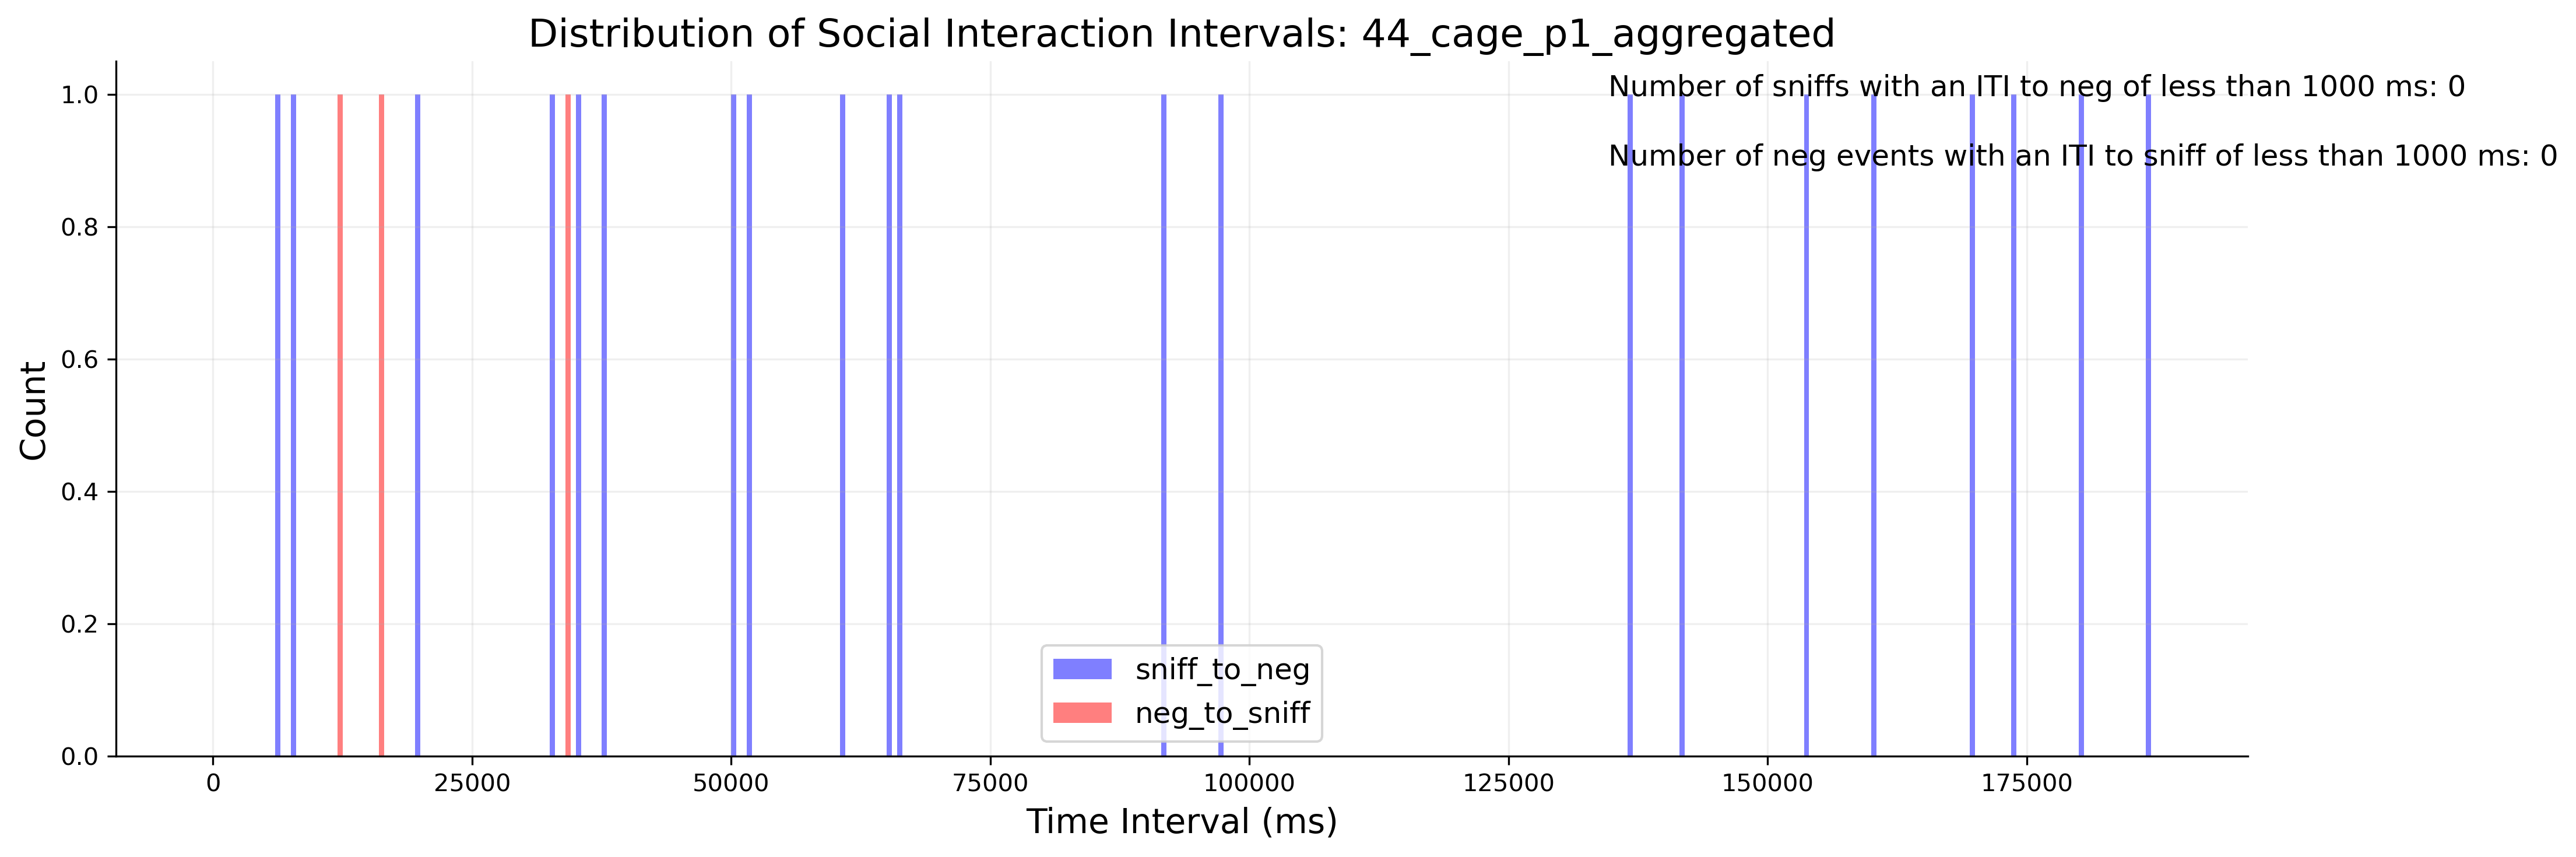

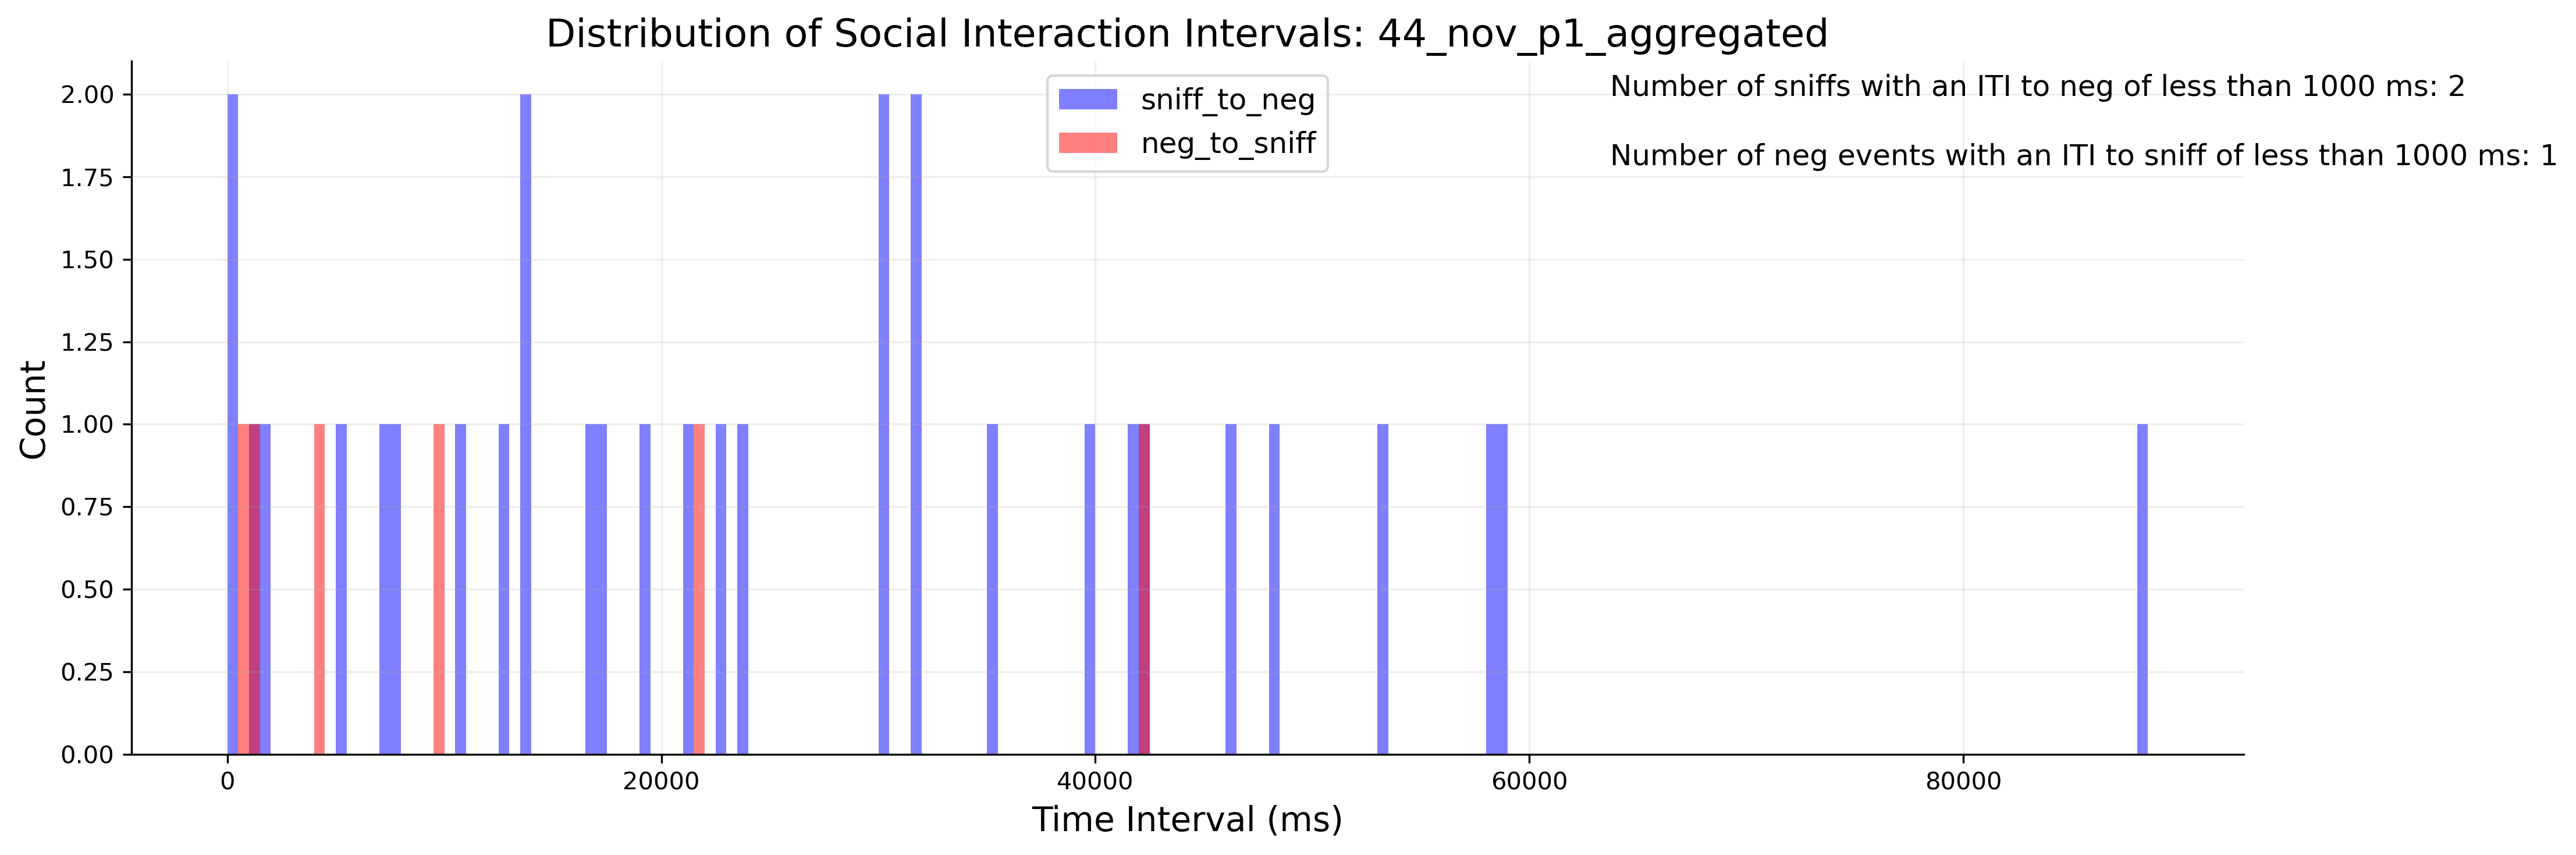

In [444]:
# Get unique recordings
recordings = df['recording'].unique()

# Create separate plot for each recording
for recording in recordings:
   plt.figure(figsize=(15, 5), dpi=300)  # High resolution
   recording_data = df[df['recording'] == recording]
   
   # Calculate bin edges (500ms bins)
   max_interval = recording_data['interval'].max()
   bins = np.arange(0, max_interval + 500, 500)  # 500ms bins
   
   # Count quick transitions for both directions (now using 1000ms threshold)
   quick_sniff_to_neg = len(recording_data[
       (recording_data['transition_type'] == 'sniff_to_neg') & 
       (recording_data['interval'] < 1000)
   ])
   
   quick_neg_to_sniff = len(recording_data[
       (recording_data['transition_type'] == 'neg_to_sniff') & 
       (recording_data['interval'] < 1000)
   ])
   
   # Plot histogram for each transition type
   for transition_type in ['sniff_to_neg', 'neg_to_sniff']:
       transition_data = recording_data[recording_data['transition_type'] == transition_type]
       
       if len(transition_data) > 0:  # Only plot if there are intervals
           plt.hist(transition_data['interval'], 
                   bins=bins,
                   alpha=0.5,
                   label=transition_type,
                   color=colors[transition_type])

   plt.xlabel('Time Interval (ms)', fontsize=14)
   plt.ylabel('Count', fontsize=14)
   plt.title(f'Distribution of Social Interaction Intervals: {recording}', fontsize=16)
   plt.legend(fontsize=12)
   
   # Add text for both quick transitions counts (updated text to show 1000ms threshold)
   plt.text(0.7, 0.95, f'Number of sniffs with an ITI to neg of less than 1000 ms: {quick_sniff_to_neg}', 
            transform=plt.gca().transAxes, 
            fontsize=12)
   
   plt.text(0.7, 0.85, f'Number of neg events with an ITI to sniff of less than 1000 ms: {quick_neg_to_sniff}', 
            transform=plt.gca().transAxes, 
            fontsize=12)
   
   # Customize plot
   plt.grid(True, alpha=0.2)
   
   # Remove spines
   plt.gca().spines['top'].set_visible(False)
   plt.gca().spines['right'].set_visible(False)
   
   plt.tight_layout()
   plt.show()

In [325]:
import spike.spike_analysis.pca_trajectories as pca_t



cagemate_collection = unpickle_this('cagemate_collection.pkl')
novel_collection = unpickle_this('novel_collection.pkl')

for recording in cagemate_collection.collection:
    subject = str(int(recording.name.split('_')[0])/10)
    recording_pattern = (recording.name.split('_')[0] + '_' +
                         recording.name.split('_')[1] + '_' +
                         recording.name.split('_')[2] + '_' +
                         'aggregated')
    recording.event_dict = behavior_dicts[recording_pattern]
    recording.subject = subject

for recording in novel_collection.collection:
    subject = str(int(recording.name.split('_')[0])/10)
    recording_pattern = (recording.name.split('_')[0] + '_' +
                         recording.name.split('_')[1] + '_' +
                         recording.name.split('_')[2] + '_' +
                         'aggregated')
    recording.event_dict = behavior_dicts[recording_pattern]
    recording.subject = subject

AttributeError: 'tuple' object has no attribute 'shape'

All set to analyze
Excluding 11_cage_p1_merged.rec, it has no aversive events
Excluding 21_cage_p1_merged.rec, it has no aversive events
Excluding 31_cage_p1_merged.rec with 1 neurons
Excluding 32_cage_p1_merged.rec, it has no aversive events
Excluding 33_cage_p1_merged.rec with 2 neurons


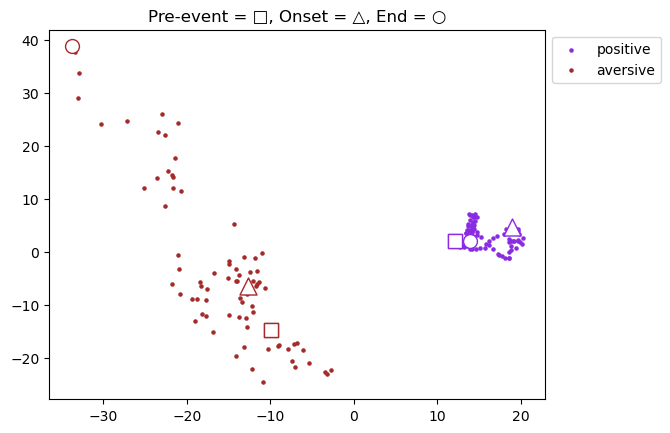

In [417]:
from importlib import reload
reload(pca_t)
cagemate_collection.analyze(timebin=50, ignore_freq = 0.5, smoothing_window=500)
pc_object = pca_t.avg_trajectories_pca(cagemate_collection, event_length =3, pre_window = 1, post_window = 0, events = ['positive', 'aversive'], min_neurons = 4)

All set to analyze
Excluding 22_nov_p1_merged.rec, it has no aversive events
Excluding 24_nov_p1_merged.rec, it has no aversive events
Excluding 32_nov_p1_merged.rec, it has no aversive events
Excluding 33_nov_p1_merged.rec with 1 neurons
Excluding 41_nov_p1_merged.rec, it has no aversive events


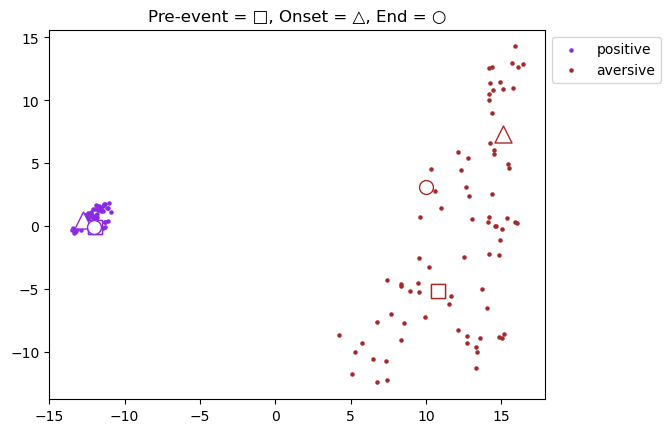

In [418]:
novel_collection.analyze(timebin=50, ignore_freq = 0.5,smoothing_window = 500)
pc_object = pca_t.avg_trajectories_pca(novel_collection, event_length =3, pre_window = 1, post_window = 0, events = ['positive', 'aversive'], min_neurons = 4)

In [419]:
print(pc_object)

PCA Result with:
Events: positive, aversive
Timebins per event: 80.0
Total neurons: 70
Number of recordings: 5
Number of Pcs needed to explain 90% of variance 1


In [423]:
print(repr(pc_object))

              Recording  Number of Neurons  Number of positive events  \
0  11_nov_p1_merged.rec                 20                         99   
1  12_nov_p1_merged.rec                 15                         71   
2  44_nov_p1_merged.rec                 14                        120   
3  13_nov_p1_merged.rec                 11                        108   
4  21_nov_p1_merged.rec                 10                         77   

   Number of aversive events  
0                          9  
1                          3  
2                          6  
3                          3  
4                          2  


Excluding 22_nov_p1_merged.rec, it has no aversive events
Excluding 24_nov_p1_merged.rec, it has no aversive events
Excluding 32_nov_p1_merged.rec, it has no aversive events
Excluding 33_nov_p1_merged.rec with 1 neurons
Excluding 41_nov_p1_merged.rec, it has no aversive events
Excluding 22_nov_p1_merged.rec, it has no aversive events
Excluding 24_nov_p1_merged.rec, it has no aversive events
Excluding 32_nov_p1_merged.rec, it has no aversive events
Excluding 33_nov_p1_merged.rec with 1 neurons
Excluding 41_nov_p1_merged.rec, it has no aversive events
{'positive': 71, 'aversive': 2}
Excluding 22_nov_p1_merged.rec, it has no aversive events
Excluding 24_nov_p1_merged.rec, it has no aversive events
Excluding 32_nov_p1_merged.rec, it has no aversive events
Excluding 33_nov_p1_merged.rec with 1 neurons
Excluding 41_nov_p1_merged.rec, it has no aversive events
Excluding 22_nov_p1_merged.rec, it has no aversive events
Excluding 24_nov_p1_merged.rec, it has no aversive events
Excluding 32_nov_p

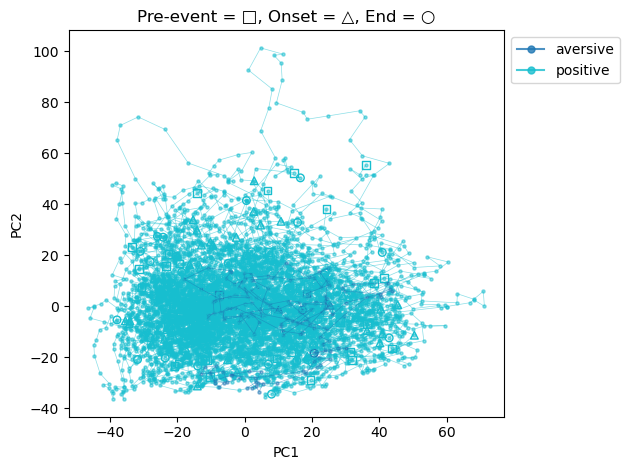

              Recording  Number of Neurons  Number of positive events  \
0  11_nov_p1_merged.rec                 20                         99   
1  12_nov_p1_merged.rec                 15                         71   
2  44_nov_p1_merged.rec                 14                        120   
3  13_nov_p1_merged.rec                 11                        108   
4  21_nov_p1_merged.rec                 10                         77   

   Number of aversive events  
0                          9  
1                          3  
2                          6  
3                          3  
4                          2  

In [436]:
reload(pca_t)
pca_t.trial_trajectories_pca(novel_collection, event_length =3, pre_window = 1, post_window = 0, events = ['positive', 'aversive'], min_neurons = 4)